# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

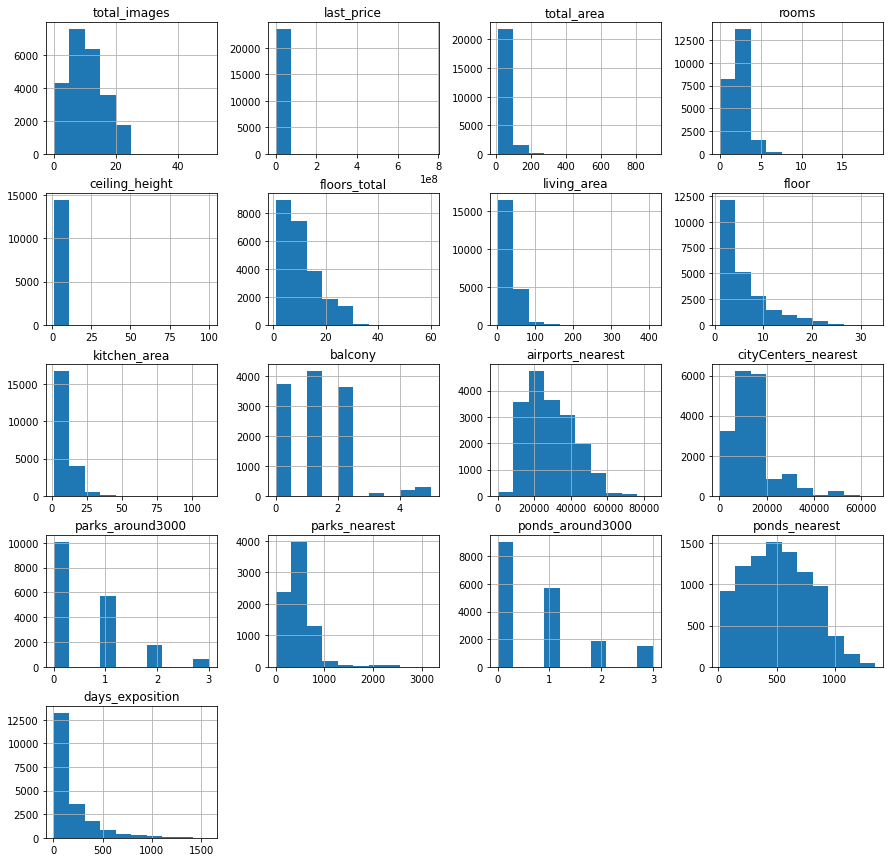

In [5]:
data.hist(figsize = (15, 15))
plt.show()

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
***Вывод:*** \
\
На данном этапе был открыт файл с данными и изучена общая информация по нему для возможности приступить к дальнейшим шагам работы.
    
Было обнаружено что, столбцы 'first_day_exposition', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition' - имеют неправильный тип данных, что может отразиться на будущих результатах. Опираясь на данное предположение, на следущем этапе данные столбцы будут заново проанализированы для устранения такого рода ошибок.
    
При анализе заголовков столбцов не было выявлено никаких замечаний, которые должны подвергнуться дополнительному анализу.

Однако, было обаружено, что в 14 (четырнадцати) следующих столбцах: 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' - присутсвуют пропущенные значения, они будут также более подробно изучены и устранены по возможности на следующем этапе работы. 
    
Кроме того, при построении гистограмм каждого показателя и предварительном анализе их распределений, возникли сомнения по поводу хранящихся там аномальных значений, что будет более тщательно рассмотрено в последущих этапах работы над проектом.   

# Предобработка данных

***ПОИСК ПРОПУЩЕННЫХ ЗНАЧЕНИЙ***

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.isnull().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

**Данные полученные от пользователей сервиса:**

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

***Пояснение:*** 

Был обработан столбец 'ceiling_height', содержащий в себе информацию о высоте потолков, на предмет содержания в нем пропущенных значений. Так, пропущенные значения были заменены на медианное значение высоты потолков по всем имеющимся данным этого столбца. Использование именно медианой обуславливается тем, что она более правдоподобно отразит стандартизированные значения (коими и является высота потолков в квартирах) и не будет подвержено аномальным значениям, если те содержатся в исходных данных.

In [9]:
for floor in data ['floor'].unique():
    data.loc[(data['floor'] == floor) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['floor'] == floor), 'floors_total'].median()

***Пояснение:*** 

Был обработан столбец 'floors_total', содержащий в себе информацию о количестве этажей в доме, на предмет содержания в нем пропущенных значений. Так, пропущенные значения были заменены на медианное значение количества этажей согласно номеру этажа квартиры, указанному в столбце 'floor'. Использование именно медианой обуславливается тем, что она более правдоподобно отразит стандартизированные значения (коими и является количество этажей в многоквартирном доме) и не будет подвержено аномальным значениям, если те содержатся в исходных данных.

In [10]:
data.loc [data['living_area'] > (data['total_area'] - data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.65,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,...,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,NaN,...,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,2.65,16.0,62.00,12,NaN,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,2.65,5.0,44.00,5,NaN,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


In [11]:
data.loc [data['living_area'] > (data['total_area'] - data['kitchen_area'])].isna().sum()

total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area              0
floor                    0
is_apartment            48
studio                   0
open_plan                0
kitchen_area             0
balcony                 21
locality_name            0
airports_nearest        20
cityCenters_nearest     20
parks_around3000        20
parks_nearest           46
ponds_around3000        20
ponds_nearest           47
days_exposition          8
dtype: int64

In [12]:
for rooms in data ['rooms'].unique():
    data.loc[(data['rooms'] == rooms) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == rooms), 'living_area'].min()

In [13]:
data['living_area'].isna().sum()

0

In [14]:
data.loc [data['living_area'] > (data['total_area'] - data['kitchen_area'])] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.65,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,...,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,NaN,...,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,2.65,16.0,62.00,12,NaN,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,2.65,5.0,44.00,5,NaN,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


In [15]:
data.loc [data['living_area'] <= (data['total_area'] - data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,2.0,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


***Пояснение:*** 

Был обработан столбец 'living_area', содержащий в себе информацию о жилой площади квартиры в метрах, на предмет содержания в нем пропущенных значений. Так, пропущенные значения были заменены на минимальное значение жилой площади квартиры согласно уникальным числам комнат, указанным в столбце 'rooms'. Использование именно такой схемы обуславливается тем, что для корректного заполнения пропущенных значений жилой площади необходимо иметь несколько показателя: общая площадь и площади кухни, а в идеале еще и площадь санузла, и гардеробной, если таковая имеется), однако, в наших данных присутсвуют также пропуски в площади кухни, что не дает возможность расчитать простым вычитанием даже примерную жилую площадь. 

Более того, при обработке данного столбца, было обнаружено, что изначально в датасете указаны несколько некорректных данных касательно общей площади, жилой площади и площади кухни. Данные ошибки были обнаружены при проверке данных по логике "жилая площадь должна быть меньше, чем разность общей площади и площади кухни". Таким образом, полностью доверять медиане и среднему значению в данном подсчете нельзя. Именно поэтому и была выбрана данная схема.

Некорректные данные в датасете, о которых говорилось выше, будут обработаны на последующих этапах работы.

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [17]:
data['is_apartment'] = data['is_apartment'].fillna('False')

***Пояснение:*** 

Был обработан столбец 'is_apartment', содержащий в себе информацию об апартаменты ли на продаже, на предмет содержания в нем пропущенных значений. Стоит пояснить, что в столбце хранились данные булевого типа, то есть в каждой ячейке находилось 'True' или 'False', где значение 'True' обозначало апартаменты, а 'False' - не апартаменты. 

Так, пропущенные значения были заменены значение 'False'. Использование именно данного значения обуславливается тем, что эти данные заполняются клиентом самостоятельно, и появление большого количества пропущенных значений свидетельствует о том, что продавцы не апартаментов пропускали данный вопрос при заполнении объявления, а не заполняли его соответсвующим значением.

In [18]:
for kitchen_area in data ['kitchen_area'].isna():
    data ['kitchen_area'] = data ['total_area'] - data['living_area']

In [19]:
data[data['kitchen_area'] > (data['total_area'] - data['living_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


***Пояснение:*** 

Был обработан столбец 'kitchen_area', содержащий в себе информацию о площадь кухни в квадратных метрах, на предмет содержания в нем пропущенных значений. Так, пропущенные значения были заменены на разность общей площади и жилой площади. Использование именно такой схемы исходит из логики "площадь кухни должна быть меньше, чем разность общей площади и жилой площади". 

Изначально для корректного заполнения пропущенных значений площади кухни необходимо иметь несколько показателей: общая площадь и жилая площади, а в идеале еще и площадь санузла, и гардеробной, если таковая имеется. Однако, в датасете отсутсвуют данные о санузле и гардеробной, а также присутсвовали пропуски в жилой площади, что не дает возможность расчитать площадь кухни наиболее точно для заполнения пропущенных значений. 

Таким образом была выбрана конечная схема заполнения пропусков в данной столбце.

In [20]:
data['balcony'] = data['balcony'].fillna(0)

**Пояснение:**

Был обработан столбец 'balcony', содержащий в себе информацию о числе балконов к вартире, на предмет содержания в нем пропущенных 
значений. Так, пропущенные значения были заменены значение 0 (ноль). Использование именно данного значения обуславливается тем, что 
эти данные заполняются клиентом самостоятельно, и появление большого количества пропущенных значений свидетельствует о том, что продавцы, 
в квартире у которых нет балконов, пропускали данный вопрос при заполнении объявления, а не заполняли его соответсвующим числом.

In [21]:
data = data.dropna(subset = ['locality_name'])

**Пояснение:**

Был обработан столбец 'locality_name', содержащий в себе информацию о название населённого пункта, на предмет содержания в нем пропущенных значений. Так, пропущенные значения были удалены из столбца, а вместе с ним и удалены все строки, где содержались такие пропуски. Данное решение было принято по причине невозможности в дальнейшем опираться на данные с утсутсвующем названием населенного пункта, так как часть данных, получаемых автоматически сервисом, не будет получена вовсе. Также такие данные составили лишь 0.2% от всех данных, поэтому их удаление никак не повлияет на дальнейшие расчеты.

**Данные полученные автоматически от сервиса:**

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [23]:
data ['airports_nearest']

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23650, dtype: float64

**Пояснение:**

Пропуски в столбце 'airports_nearest', содержащем в себе информацию о расстояние до ближайшего аэропорта в метрах, не могут быть обработаны и заполнены медианным, средним значением или другими значениями, так как эти данные были получены автоматически от сервиса, и причины их появления не явные.

In [24]:
data ['cityCenters_nearest']

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: cityCenters_nearest, Length: 23650, dtype: float64

**Пояснение:**

Пропуски в столбце 'cityCenters_nearest', содержащем в себе информацию о расстояние до центра города в метрах, не могут быть обработаны и заполнены медианным, средним значением или другими значениями, так как эти данные были получены автоматически от сервиса, и причины их появления не явные.

In [25]:
data ['parks_around3000']

0        1.0
1        0.0
2        1.0
3        2.0
4        2.0
        ... 
23694    1.0
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: parks_around3000, Length: 23650, dtype: float64

**Пояснение:**

Пропуски в столбце 'parks_around3000', содержащем в себе информацию о числе парков в радиусе 3 км, не могут быть обработаны и заполнены медианным, средним значением или другими значениями, так как эти данные были получены автоматически от сервиса, и причины их появления не явные.

In [26]:
data ['parks_nearest']

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23650, dtype: float64

**Пояснение:**

Пропуски в столбце 'parks_nearest', содержащем в себе информацию о расстояние до ближайшего парка в метрах, не могут быть обработаны и заполнены медианным, средним значением или другими значениями, так как эти данные были получены автоматически от сервиса, и причины их появления не явные.

In [27]:
data['ponds_around3000']

0        2.0
1        0.0
2        2.0
3        3.0
4        1.0
        ... 
23694    3.0
23695    NaN
23696    NaN
23697    3.0
23698    NaN
Name: ponds_around3000, Length: 23650, dtype: float64

**Пояснение:**

Пропуски в столбце 'ponds_around3000', содержащем в себе информацию о числе водоёмов в радиусе 3 км, не могут быть обработаны и заполнены медианным, средним значением или другими значениями, так как эти данные были получены автоматически от сервиса, и причины их появления не явные.

In [28]:
data ['ponds_nearest']

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23650, dtype: float64

**Пояснение:**

Пропуски в столбце 'ponds_nearest', содержащем в себе информацию о расстояние до ближайшего водоёма в метрах, не могут быть обработаны и заполнены медианным, средним значением или другими значениями, так как эти данные были получены автоматически от сервиса, и причины их появления не явные.

In [29]:
data ['days_exposition']

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23650, dtype: float64

**Пояснение:**

Столбец 'days_exposition', содержащий в себе информацию о количестве дней размещения объявления (от публикации до снятия), остается без обработки на пропущенные значения, так как присутсвие такового может является признаком того, что объявление еще активно на сервисе (не было снято). Более того, пропуски не могут быть обработаны и заполнены медианным, средним значением или другими значениями, так как эти данные были получены автоматически от сервиса, и причины их появления не явные.

In [30]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
Пропуски были обнаружены в 14 (четырнадцати) столбцах из 21 (двадцати одного) в таблице. Стоит отметить, что 7 (семь) из них - это данные, полученные непосредственно от клиентов сервиса, когда как остальные 7 (семь) - это данные, которые заполняются автоматически самим сервисом на основе картографических данных. 

Причины появления пропусков в первой группе данных могут быть объяснены с большей долей вероятности ошибкой пользователей сервиса при вводе информации в соответсвующие поля, так, яркий тому пример - это пропуски в столбце 'is_apartment' (где указывается апартаменты это или нет). Такие данные были заменены на медианное, категориальное или другие значения согласно информации содержащейся конкретно в каждом таком столбце. Стоит отметить еще раз, что строки, которые содержали пропущенные значения в столбце 'locality_name', были удалены во всем датасете, по причине их ненадежности для проведения будущих вычислений.

Однако, более серьезными являются причины появления пропусков во всех данных второй группы, так как они могут свидетельствовать о некорректной работе сервиса, что задруднит анализ по таким данным. Такие данные не были заменены на среднее или медианное значения для каждого столбца для продолжения дальнейшей работы над ними. В столбце 'days exposition' не были ни удалены, ни обработаны пропущенные значения, так как их наличие - это возможный показатель того, что объявление все еще размещено на сервисе.

***ИЗМЕНЕНИЕ ТИПОВ ДАННЫХ***

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [32]:
data['floors_total'] = data['floors_total'].astype('int')

In [33]:
data['balcony'] = data['balcony'].astype('int')

In [34]:
data['ceiling_height'] = round(data['ceiling_height'], 2) 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
Типы данных были изменены в 3 (трех) столбцах из 21 (двадцати одного) в таблице. Данные изменения обусловлены корректностью анализа в последующих шагах работы, так как неправильно указанный тип данных может повлиять на выполнение кода в целом или на правдивость его результата. Стоит так же пояснить, что это негрубая ошибка в данных, которая легко поддается исправлению и чаще всего возникающая на этапе сбора данных.
    
Таким образом, типы данных были скорректированы следующим образом: 
1) столбец 'first_day_exposition' с датой публикации объявления - с oblect (тип данных для текста) на datetime64[ns] (тип данных для даты);\
2) столбец 'floors_total' с количеством этажей в доме - с float64 (тип данных для дробных) на int64 (тип данных для обычных чисел);\
3) столбец 'balcony' с количеством балконов - с float64 (тип данных для дробных) на int64 (тип данных для обычных чисел).

**ОБРАБОТКА УНИКАЛЬНЫХ ЗНАЧЕНИЙ**

In [36]:
data.duplicated().sum()

0

In [37]:
data['locality_name'].nunique()

364

In [38]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['посёлок', 'городской поселок', 'поселок Мурино', 'деревня Кудрово'], \
             ['поселок', 'поселок городского типа', 'Мурино', 'Кудрово'], regex=True)
) 
data['locality_name'].nunique()

321

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
На данном этапе предобработки данных не было обнаружено явных дубликатов, то есть совершенно идентичных показателей. Однако, при рассмотрении списка уникальных значений в столбце 'locality_name' с  названиями населённых пунктов были выявлены неявные дубликаты. Такими дабликатами являются, к примеру, различные написания одного слова/словосочетаний, как 'поселок' и 'посёлок' или 'городской поселок' и 'поселок городского типа'. Такие неявные дубликаты устранимы и появляются по причине того, что каждый клиент заполняет данную графу с населенным пунктом своими словами. Во избежание такого рода ошибок рекомендуется рассмотреть внедрение выплывающих списков для таких данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [40]:
data ['price_per_m'] = data['last_price']/data['total_area']
data['price_per_m'] = round(data['price_per_m'], 1)

In [41]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [42]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [43]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [44]:
def floor_name(number):
    if number ['floor'] == number ['floors_total']:
        return 'последний'
    if number ['floor'] == 1:
        return 'первый'
    if 1 < number ['floor'] < number ['floors_total']:
        return 'другой'

data['floor_names'] = data.apply(floor_name, axis = 1)

In [45]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest_km'], 0)

In [46]:
data.sort_values(by = 'ceiling_height').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
22590,16,6000000.0,55.00,2018-10-31,2,1.00,12,32.4,7,False,...,293.0,2.0,289.0,13.0,109090.9,2,10,2018,другой,14.0
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2,27.5,1,False,...,NaN,NaN,NaN,248.0,35046.7,0,8,2017,первый,NaN
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37,17.4,5,False,...,NaN,3.0,80.0,71.0,102500.0,1,10,2017,другой,20.0
16884,0,1500000.0,33.00,2018-10-03,1,2.00,5,20.0,5,False,...,NaN,NaN,NaN,6.0,45454.5,2,10,2018,последний,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18,16.6,9,False,...,NaN,NaN,NaN,36.0,59836.3,0,12,2017,другой,NaN
22960,17,2300000.0,53.60,2018-10-18,2,2.00,2,19.0,1,False,...,NaN,NaN,NaN,NaN,42910.4,3,10,2018,первый,NaN
19329,5,1700000.0,40.00,2018-07-15,2,2.00,9,2.0,8,False,...,NaN,NaN,NaN,45.0,42500.0,6,7,2018,другой,NaN
19098,7,2700000.0,56.00,2018-02-04,3,2.00,5,46.0,1,False,...,NaN,NaN,NaN,282.0,48214.3,6,2,2018,первый,NaN
20520,9,3600000.0,38.00,2018-07-05,1,2.00,12,15.0,9,False,...,NaN,NaN,NaN,62.0,94736.8,3,7,2018,другой,NaN
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17,15.2,12,False,...,NaN,0.0,NaN,53.0,91666.7,6,6,2017,другой,27.0


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
На данном этапе в таблицу были добавлены новые столбцы для того, чтобы более цело категаризовать данные, а также нагляднее и лаконичнее продемонстрировать их, в последующем для получения более полных результатов на дальнейших этапах анализа.

Так, были сформированы следующие дополнительные столбцы:
1) 'price_per_m' - цена одного квадратного метра;\
2) 'weekday' - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);\
3) 'month_exposition' - месяц публикации объявления;\
4) 'year_exposition' - год публикации объявления;\
5) 'floor_names' - тип этажа квартиры («первый», «последний», «другой»);\
6) 'cityCenters_nearest_km' - расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

**ИЗУЧЕНИЕ ПАРАМЕТРОВ И ОБРАБОТКА АНОМАЛИЙ**

<AxesSubplot:ylabel='Frequency'>

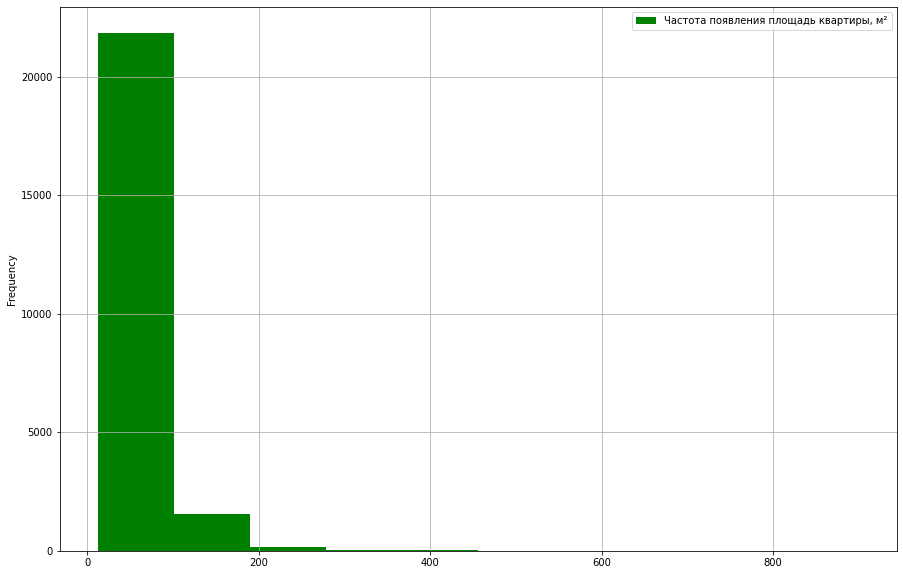

In [47]:
data['total_area'].plot(kind = 'hist', figsize = (15, 10), grid = True, color = 'green', \
                        label ='Частота появления площадь квартиры, м²', legend = 'reverse')

In [48]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

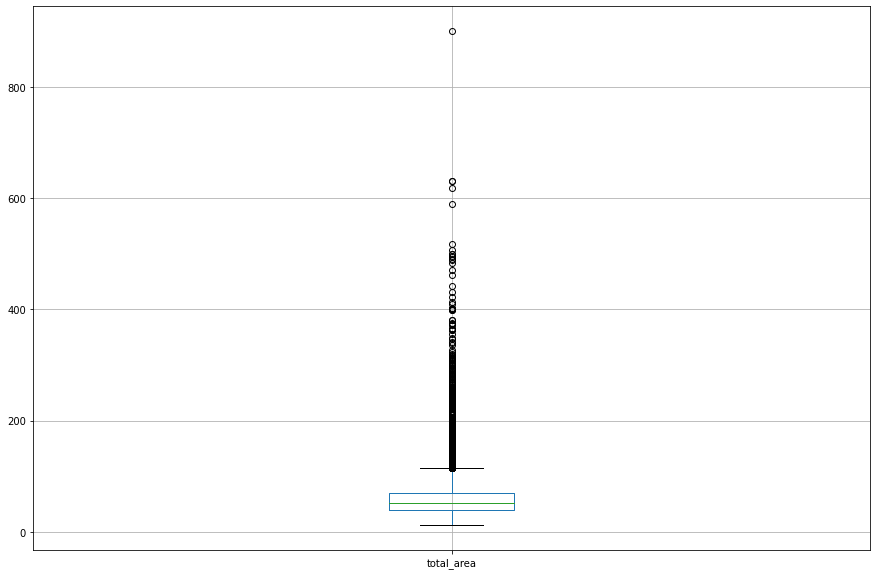

In [49]:
data.boxplot(column = 'total_area', figsize = (15,10))

In [50]:
data['total_area'].sort_values()

19904     12.0
19807     13.0
17961     13.0
19546     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23650, dtype: float64

In [51]:
data[(data['total_area'] >= 28) & (data['total_area'] <= 400)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,3.0,9,False,...,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.7,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,2.0,12,False,...,173.0,3.0,196.0,602.0,149511.4,1,3,2017,другой,10.0


**Пояснение:** 

Был обработан столбец 'total_area', содержащий информацию об общей площади квартиры в квадратных метрах (м²), а для иллюстрации частоты появления построена гистограмма (на ней столбцами зеленого цвета разной высоты отображены группы площадей с шагом 200; чем выше столбец, тем чаще его группа встречается в исходных данных).

Так, по графику можно сделать вывод, что площадь не начинается с 0 (нуля), что говорит о том, что аномальных значений такого рода нет, также можно заметить, что происходит резкое падение столбца, содержащего площади квартир от 100 м² до 180 м², после 181 м² резко становятся не такими частыми, далее после 280 м² уже практически становяться единичными.

Более того, отсортировав столбец 'total_area' по возрастанию его значений, было обнаружено, что минимальное значение площади равно 12 м², что противоречит нормам строительства многоквартирных домов (минимальная квадратура для "однушки" равна 28 м²).

Также при ограничении данных была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее, тем больше там данных, попавших в данную область. 

Таким образом, для получния наиболее точных и надежных результатов работы было принято решение ограничить данные в столбце 'total_area' с 28 м² до 400 м² включительно.

<AxesSubplot:ylabel='Frequency'>

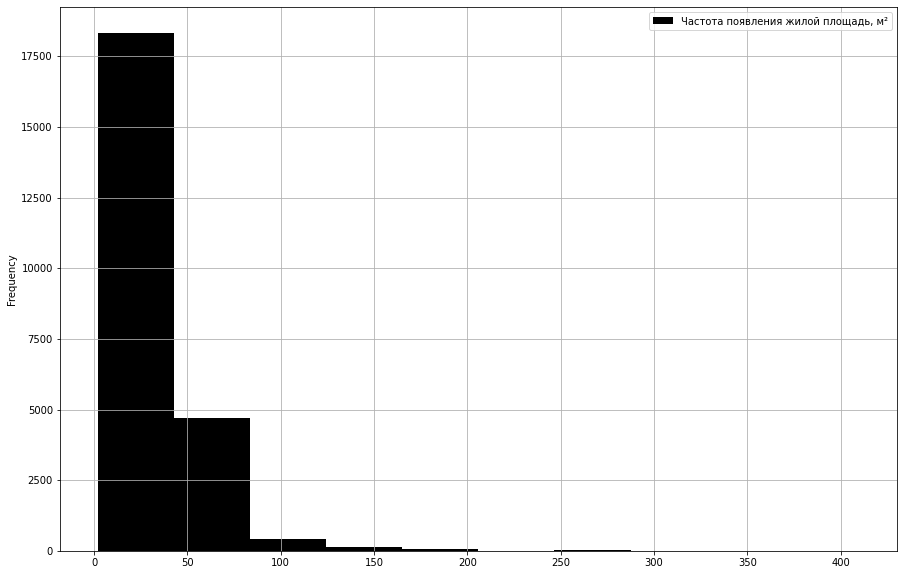

In [52]:
data['living_area'].plot(kind = 'hist', figsize = (15, 10), grid = True, color = 'black', \
                        label ='Частота появления жилой площадь, м²', legend = 'reverse')

In [53]:
data['living_area'].describe()

count    23650.000000
mean        31.968111
std         22.806996
min          2.000000
25%         17.900000
50%         29.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

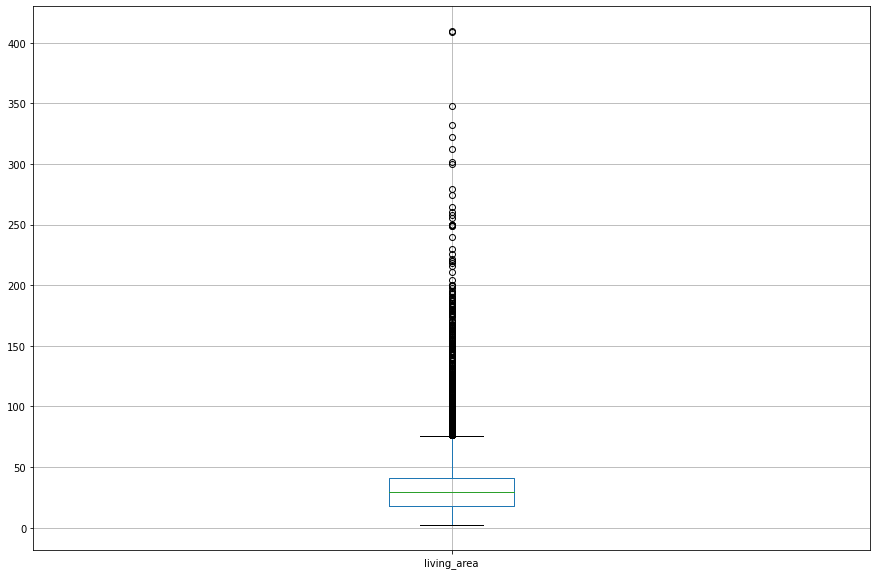

In [54]:
data.boxplot (column = 'living_area', figsize = (15,10))

In [55]:
data['living_area'].sort_values()

20235      2.0
20436      2.0
18294      2.0
3903       2.0
3901       2.0
         ...  
12859    322.3
4237     332.0
12401    347.5
5358     409.0
19540    409.7
Name: living_area, Length: 23650, dtype: float64

In [56]:
data [(data['living_area'] >= 14) & (data['living_area'] <= 200)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.8,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,...,NaN,NaN,NaN,413.0,45000.0,4,7,2017,другой,NaN
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,352.0,1.0,675.0,239.0,73717.9,4,8,2016,другой,34.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой,NaN


In [57]:
data [(data['living_area'] >= 14) & (data['living_area'] <= 200) & \
      (data['living_area'] <= (data['total_area'] - data['kitchen_area']))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.8,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,...,NaN,NaN,NaN,413.0,45000.0,4,7,2017,другой,NaN
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,352.0,1.0,675.0,239.0,73717.9,4,8,2016,другой,34.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой,NaN


**Пояснение:** 

Был обработан столбец 'living_area', содержащий информацию об жилой площади квартиры в квадратных метрах (м²), а для иллюстрации 
частоты появления построена гистограмма (на ней столбцами черного цвета разной высоты отображены группы площадей с шагом 50; чем выше 
столбец, тем чаще его группа встречается в исходных данных).

Так, по графику можно сделать вывод, что площадь не начинается с 0 (нуля), что говорит о том, что аномальных значений такого рода нет, 
также можно заметить, что жилая площадь квартир более 40 м² резко становится не такой частой, такой же резкий спад можно наблюдать после 
80 м², а после 125 м² становяться близки к единичными. Жилые площади группы от 249 м² до 280 м² отделены от других значений 
(отображаются на графике как "островок"), что свидетельствует об их аномальной природе.

Более того, отсортировав столбец 'total_area' по возрастанию его значений, было обнаружено, что минимальное значение жилой площади равно
2 м², что противоречит нормам строительства многоквартирных домов (минимальная жилая квадратура для "однушки" равна 14 м²).

Также было добавлено условие, что жилая площадь должна быть меньше или равна разности общей площади и площади кухни, обусловленное заменой пропущенных значений и выявленными некорректными данными на этапе предобработки данных.

При ограничении данных была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее, тем больше там данных, попавших в данную область. 

Таким образом, для получния наиболее точных и надежных результатов работы было принято решение ограничить данные в столбце 'total_area' 
с 14 м² до 200 м² включительно.

<AxesSubplot:ylabel='Frequency'>

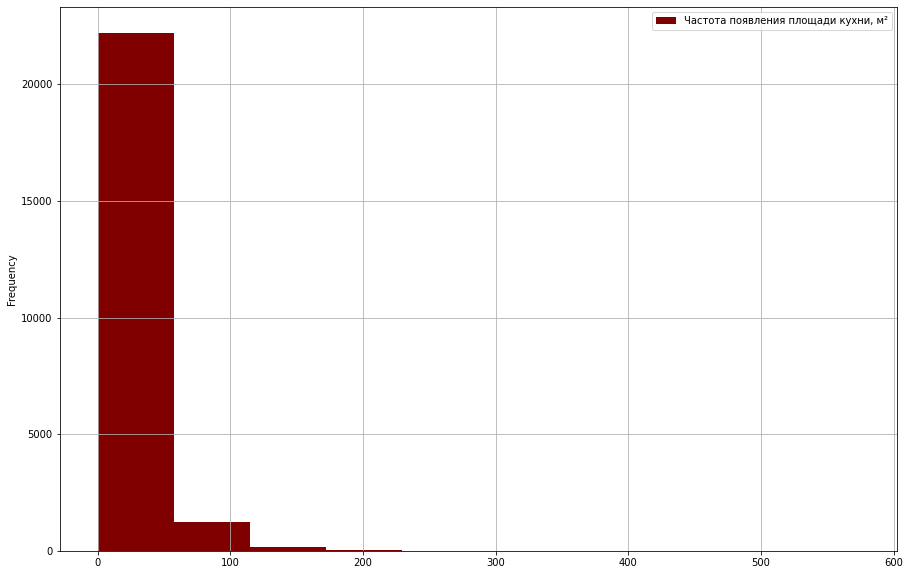

In [58]:
data['kitchen_area'].plot(kind = 'hist', figsize = (15, 10), grid = True, color = 'maroon', \
                        label ='Частота появления площади кухни, м²', legend = 'reverse')

In [59]:
data['kitchen_area'].describe()

count    23650.000000
mean        28.360958
std         21.506327
min          0.000000
25%         17.500000
50%         23.000000
75%         31.800000
max        573.600000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

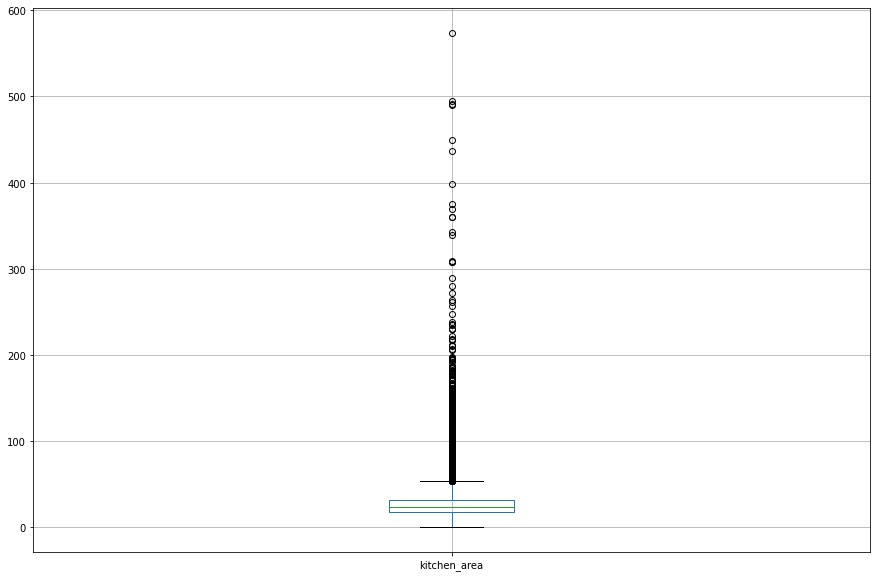

In [60]:
data.boxplot(column = 'kitchen_area', figsize = (15,10))

In [61]:
data['kitchen_area'].sort_values()

9861       0.00
12691      0.00
10606      0.27
15513      0.82
1992       1.00
          ...  
5893     449.00
19540    490.30
9826     491.10
15016    494.60
3117     573.60
Name: kitchen_area, Length: 23650, dtype: float64

In [62]:
data [(data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 250)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,3.0,9,False,...,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.7,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,2.0,12,False,...,173.0,3.0,196.0,602.0,149511.4,1,3,2017,другой,10.0


In [63]:
data [(data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 250) & \
      (data['kitchen_area'] <= (data['total_area'] - data['living_area']))] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,3.0,9,False,...,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.7,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,2.0,12,False,...,173.0,3.0,196.0,602.0,149511.4,1,3,2017,другой,10.0


**Пояснение:** 

Был обработан столбец 'kitchen_area', содержащий информацию об площади кухни квартиры в квадратных метрах (м²), а для иллюстрации 
частоты появления построена гистограмма (на ней столбцами коричневого цвета разной высоты отображены группы площадей с шагом 20; чем выше 
столбец, тем чаще его группа встречается в исходных данных).

Так, по графику можно сделать вывод, что площадь начинается с 0 (нуля), что говорит о том, что аномальных значений такого рода присутсвуют, также можно заметить, что кухни более 50 м² резко становятся не такими распространенными, резкий спад также можно наблюдать после 110 м², когда количество таких кухонь становится ближе к единичным, а после 170 м² уже практически такие кухни становяться аномальными. 

Более того, отсортировав столбец 'kitchen_area' по возрастанию его значений, было обнаружено, что минимальное значение площади кухни равно 1.3 м², что противоречит нормам строительства многоквартирных домов (минимальная квадратура кухни для "однушки" равна 5 м²).

Также было добавлено условие, что площадь кухни должна быть меньше или равна разности общей площади и жилой площади, обусловленное заменой пропущенных значений и выявленными некорректными данными на этапе предобработки данных.

При ограничении данных была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее, тем больше там данных, попавших в данную область. 

Таким образом, для получния наиболее точных и надежных результатов работы было принято решение ограничить данные в столбце 'kitchen_area' с 5 м² до 250 м² включительно.

<AxesSubplot:ylabel='Frequency'>

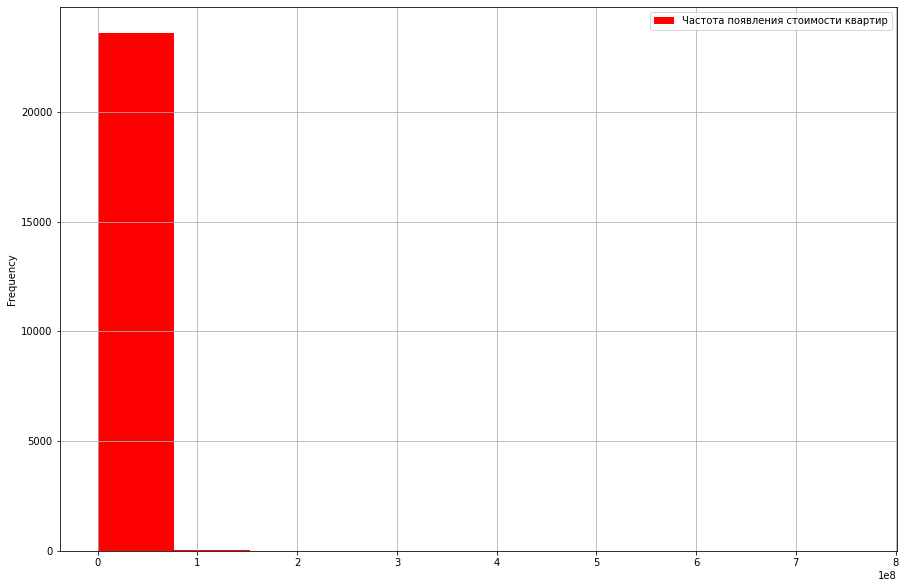

In [64]:
data['last_price'].plot(kind = 'hist', figsize = (15, 10), grid = True, color = 'red', \
                        label ='Частота появления стоимости квартир', legend = 'reverse')

In [65]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

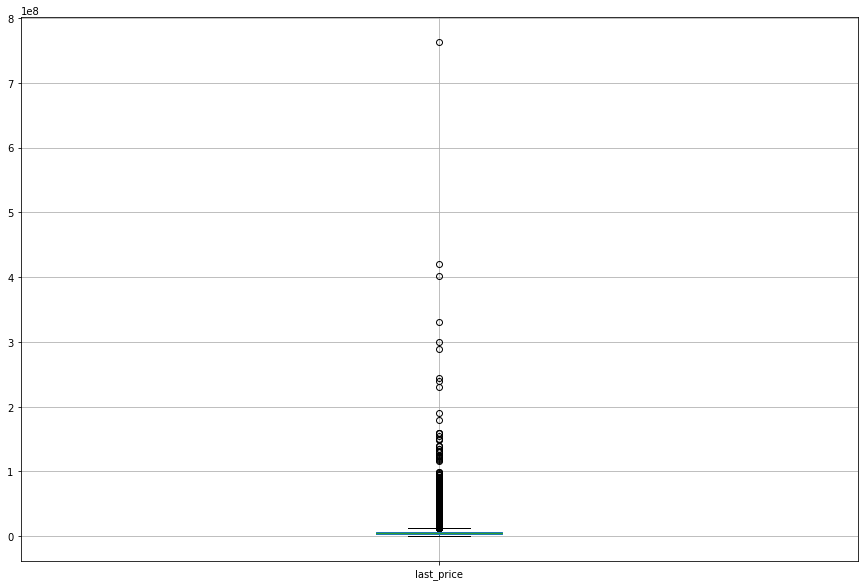

In [66]:
data.boxplot(column = 'last_price', figsize = (15,10))

In [67]:
data['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23650, dtype: float64

In [68]:
data[(data['last_price'] > 12190) & (data['last_price'] < 763000000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,3.0,9,False,...,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.7,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,2.0,12,False,...,173.0,3.0,196.0,602.0,149511.4,1,3,2017,другой,10.0


**Пояснение:** 

Был обработан столбец 'last_price', содержащий информацию о стоимости квартиры на момент снятия ее с продажи, а для иллюстрации частоты появления построена гистограмма (на ней столбцами красного цвета разной высоты отображены группы площадей с шагом 1; чем выше 
столбец, тем чаще его группа встречается в исходных данных).

Так, по графику можно сделать вывод, что стоимость начинается с 0 (нуля), что говорит о том, что присутсвует аномальное значение такого рода, также можно заметить, что стоимость после 0.8 резко становится аномальной, стремясь к 0 (нулю) относительно других показателей. 

Более того, отсортировав столбец 'last_price' по возрастанию его значений, было обнаружено, что минимальное значение стоимости равно 12190.0, что выбивается из всех остальных данных и является аномальным значением, что и повлияло на расположение графика близко к 0 (нулю). Также, отсортировав столбец 'last_price' по убыванию его значений, было замечено, что максимальная стоимость сотавляет 763000000.0, что также является аномальным значением, так как намного превышает идущую за ним стоимость.

Также при ограничении данных была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее, тем больше там данных, попавших в данную область. 

Таким образом, для получния наиболее точных и надежных результатов работы было принято решение ограничить данные в столбце 'kitchen_area' более 12190 и менее 763000000.

<AxesSubplot:ylabel='Frequency'>

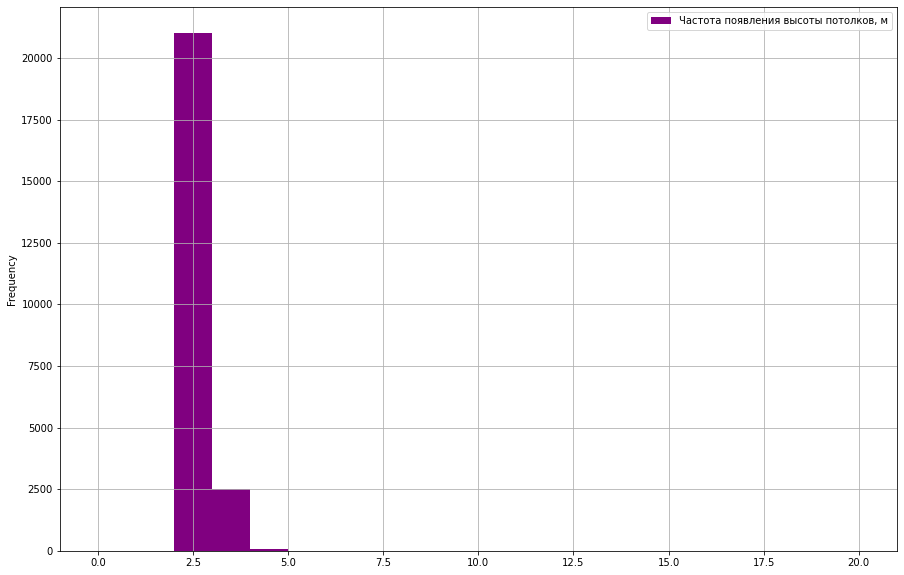

In [69]:
data['ceiling_height'].plot (kind = 'hist', figsize = (15, 10), grid = True, color = 'purple', \
                        label ='Частота появления высоты потолков, м', legend = 'reverse', \
                             bins = [0, 1, 2, 3, 4, 5, 6 ,7, 8, 9, 10, 20])

In [70]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

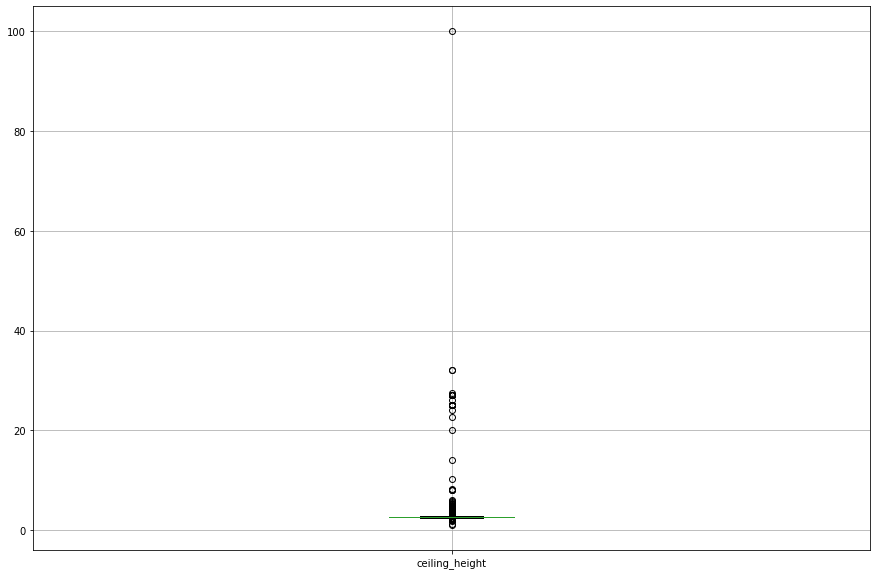

In [71]:
data.boxplot(column = 'ceiling_height', figsize = (15,10))

In [72]:
data['ceiling_height'].sort_values()

22590      1.00
5712       1.20
16934      1.75
16884      2.00
4212       2.00
          ...  
20478     27.00
21377     27.50
22336     32.00
3148      32.00
22869    100.00
Name: ceiling_height, Length: 23650, dtype: float64

In [73]:
def ceiling_norm(number):
    if number > 10:
        return number/10
    if number < 10:
        return number
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_norm)
data.sort_values(by = 'ceiling_height', ascending = False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
22869,0,15000000.0,25.0,2018-07-25,1,10.00,5,14.0,5,True,...,223.0,3.0,30.0,19.0,600000.0,2,7,2018,последний,8.0
5863,20,5650000.0,45.0,2018-08-15,1,8.30,16,19.3,14,False,...,NaN,1.0,613.0,14.0,125555.6,2,8,2018,другой,11.0
15743,14,5600000.0,67.0,2016-11-11,3,8.00,16,41.0,1,False,...,723.0,0.0,NaN,474.0,83582.1,4,11,2016,первый,11.0
3474,3,1400000.0,30.0,2018-03-16,1,8.00,5,15.3,2,False,...,NaN,NaN,NaN,125.0,46666.7,4,3,2018,другой,NaN
17442,0,5350000.0,54.0,2015-06-16,2,8.00,5,29.0,2,False,...,NaN,0.0,NaN,469.0,99074.1,1,6,2015,другой,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,NaN,3.0,80.0,71.0,102500.0,1,10,2017,другой,20.0
15061,19,5600000.0,56.4,2018-05-11,2,1.40,14,32.4,5,False,...,NaN,0.0,NaN,315.0,99290.8,4,5,2018,другой,14.0
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,NaN,NaN,NaN,248.0,35046.7,0,8,2017,первый,NaN
22309,20,5300000.0,45.0,2017-09-30,1,1.03,16,15.5,15,False,...,440.0,2.0,450.0,136.0,117777.8,5,9,2017,другой,12.0


<AxesSubplot:>

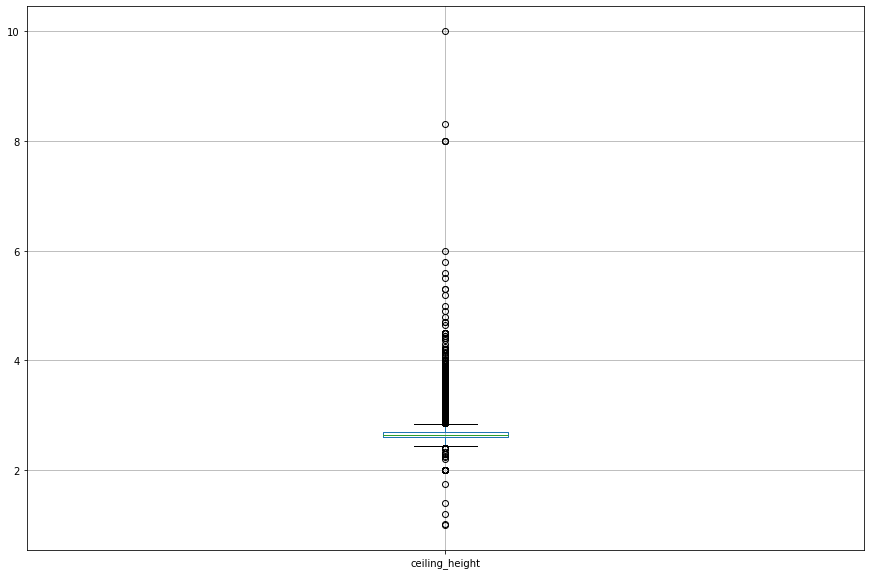

In [74]:
data.boxplot(column = 'ceiling_height', figsize = (15,10))

In [75]:
data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 5)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,3.0,9,False,...,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.7,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,2.0,12,False,...,173.0,3.0,196.0,602.0,149511.4,1,3,2017,другой,10.0


**Пояснение:** 

Был обработан столбец 'ceiling_height', содержащий информацию о высота потолков (м), а для иллюстрации частоты появления построена гистограмма (на ней столбцами фиолетового цвета разной высоты отображены группы площадей с шагом 1; чем выше 
столбец, тем чаще его группа встречается в исходных данных).

Так, по графику можно сделать вывод, что высота не начинается с 0 (нуля), что говорит о том, что аномальные значения такого рода не присутсвуют, также можно заметить, что значения с 1.8 м по 2.4 м и с 3.9 м по 4.7 м отражаются как аномальные, стремясь к 0 (нулю) относительно других показателей. Большая часть данных входит в группу с 2.5 м до 3.2 м, после чего наблюдается резких спад для показателей с 3.3 м по 3.9 м.

Более того, отсортировав столбец 'ceiling_height' по возрастанию его значений, было обнаружено, что минимальное значение высоты потолков равно 1.00 м, что выбивается из всех остальных данных и является аномальным значением. Однако, таких аномальных значений в столбце 5 (пять) штук, что может отражать ошибку пользователя при заполнении объявления о продаже квартиры. Опираясь на данное предположение, было принято решение востановить предположительную высоту потолков в таких аномальных значениях (такое решение не повлияет на данные в дальнейшем, так как они будут повторно обработаны на соответсвие стандартам). Далее столбец 'ceiling_height' был обработан на соответсвие стандартам высоты потолков в многоквартирных домах (стандартом считается высота потолков от 2.5 м до 4.0 м).

Также при ограничении данных была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее, тем больше там данных, попавших в данную область. 

Таким образом, для получния наиболее точных и надежных результатов работы было принято решение ограничить данные в столбце 'ceiling_height' с 2.5 м по 5 м включительно.

<AxesSubplot:ylabel='Frequency'>

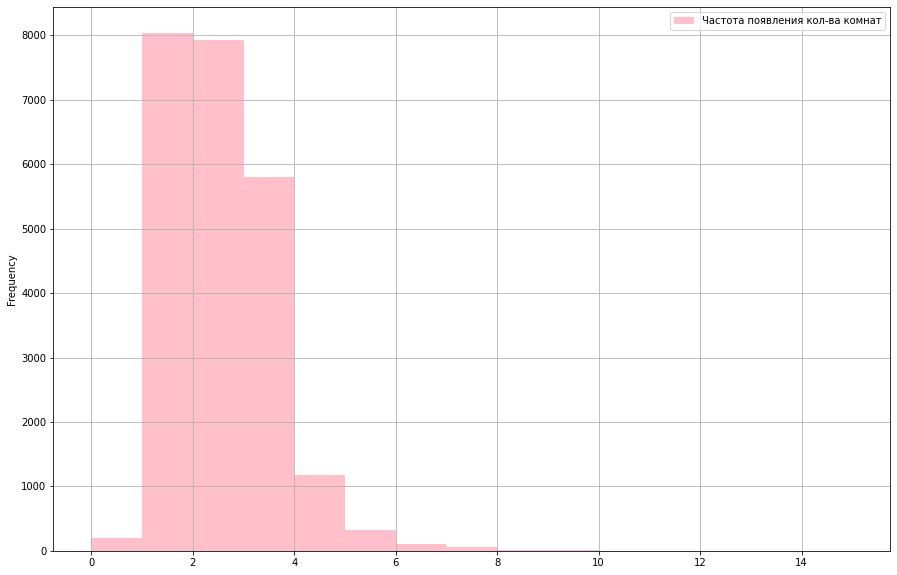

In [76]:
data['rooms'].plot (kind = 'hist', figsize = (15, 10), grid = True, color = 'pink', \
                        label ='Частота появления кол-ва комнат', legend = 'reverse', \
                    bins = [0, 1, 2, 3, 4, 5 ,6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [77]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

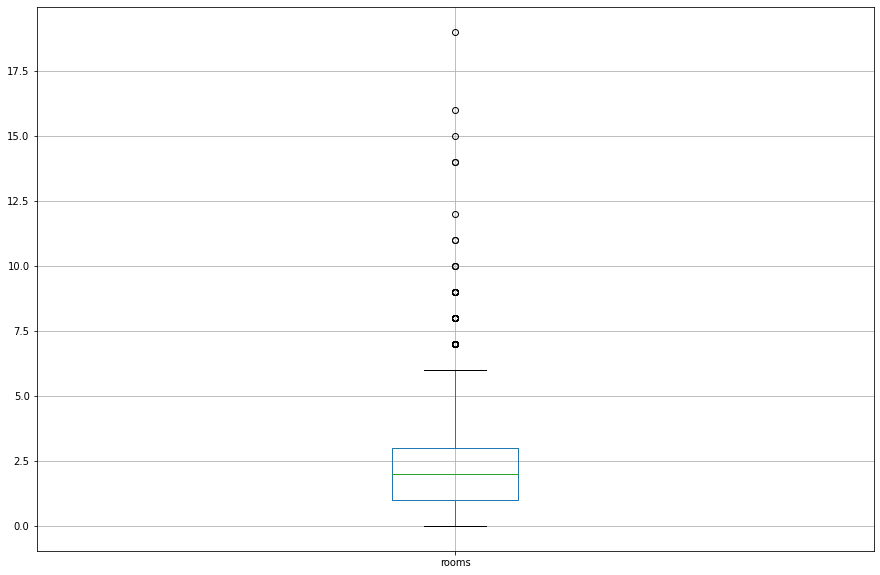

In [78]:
data.boxplot(column = 'rooms', figsize = (15,10))

In [79]:
data[data['rooms'] == 0].sort_values(by = 'total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
8886,10,2450000.0,15.5,2018-08-22,0,2.65,5,10.0,2,False,...,NaN,1.0,446.0,27.0,158064.5,2,8,2018,другой,5.0
9412,5,2100000.0,16.0,2017-12-10,0,2.65,6,13.0,1,False,...,228.0,3.0,72.0,3.0,131250.0,6,12,2017,первый,2.0
716,5,1500000.0,17.0,2017-06-07,0,2.70,9,12.0,1,False,...,NaN,0.0,NaN,40.0,88235.3,2,6,2017,первый,30.0
12996,8,1900000.0,18.0,2019-01-25,0,2.60,5,16.0,3,False,...,149.0,2.0,496.0,10.0,105555.6,4,1,2019,другой,16.0
8755,1,1350000.0,18.8,2017-11-22,0,2.75,19,15.8,1,False,...,NaN,1.0,1127.0,128.0,71808.5,2,11,2017,первый,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13613,16,8100000.0,58.4,2019-04-26,0,3.30,7,33.0,6,False,...,NaN,0.0,NaN,NaN,138698.6,4,4,2019,другой,8.0
21227,0,8200000.0,71.0,2017-07-21,0,5.80,5,68.0,5,False,...,295.0,3.0,366.0,30.0,115493.0,4,7,2017,последний,1.0
3458,6,7400000.0,73.6,2017-05-18,0,2.65,3,50.0,1,False,...,NaN,1.0,348.0,60.0,100543.5,3,5,2017,первый,6.0
20082,10,16300000.0,98.4,2017-11-08,0,3.10,5,60.5,2,False,...,NaN,1.0,674.0,537.0,165650.4,2,11,2017,другой,6.0


In [80]:
data[data['rooms'] <= 6].sort_values(by = 'total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5,10.0,2,False,...,886.0,2.0,45.0,200.0,200000.0,2,7,2017,другой,1.0
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9,3.0,1,False,...,NaN,1.0,185.0,410.0,107692.3,6,12,2017,первый,16.0
19807,0,3800000.0,13.0,2018-07-04,1,2.65,5,10.0,3,False,...,592.0,3.0,27.0,9.0,292307.7,2,7,2018,другой,1.0
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5,3.0,2,False,...,644.0,0.0,NaN,24.0,142307.7,0,3,2019,другой,5.0
19558,2,1686000.0,13.2,2018-12-17,1,2.65,5,3.0,1,False,...,361.0,1.0,155.0,19.0,127727.3,0,12,2018,первый,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,7,91075000.0,491.0,2017-05-27,5,4.20,9,274.0,9,False,...,116.0,0.0,NaN,115.0,185488.8,5,5,2017,последний,6.0
9826,1,43185328.0,494.1,2017-05-12,1,2.85,12,3.0,3,False,...,592.0,0.0,NaN,5.0,87402.0,4,5,2017,другой,7.0
5893,3,230000000.0,500.0,2017-05-31,6,2.65,7,51.0,7,False,...,NaN,2.0,198.0,50.0,460000.0,2,5,2017,последний,5.0
15016,8,150000000.0,500.0,2016-01-13,4,3.20,7,5.4,7,False,...,209.0,3.0,531.0,303.0,300000.0,2,1,2016,последний,6.0


**Пояснение:** 

Был обработан столбец 'rooms', содержащий информацию о количестве комнат в квартире, а для иллюстрации частоты появления построена гистограмма (на ней столбцами розового цвета разной высоты отображены группы площадей с шагом 1; чем выше столбец, тем чаще его группа встречается в исходных данных).

Так, по графику можно сделать вывод, что количество комнат начинается с 0 (нуля), что говорит о том, что аномальные значения такого рода  присутсвуют среди данных столбца, однако, так как таких значений немалое количество, то можно сделать вывод, что они являются неаномальными, а входят в норму. Также можно заметить, что столбец, отражающий 1 (одну) комнату, резко возрастает относительно столбца, отражающего количество 0 (ноль) комнат. Далее наблюдается небольной спад количества значений 2 (двух) комнат. Затем происходит резкий спад  для числа комнат равного 3 (трем), и после еще одно падение для 4 (четырех) комнат. Низкое расположение 5 (пяти) комнат говорит о том, что такие данные хоть и редкие, однако не единичные. Такое же заключение можно сделать и для столбца 6 (шести) и 7 (семи) комнат. Большее число комнат в квартире следует считать аномальными, так как они единичные и стремяться к нулю. 

Также при ограничении данных была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее, тем больше там данных, попавших в данную область. 

Таким образом, для получния наиболее точных и надежных результатов работы было принято решение ограничить данные в столбце 'rooms' с 0 (нуля) по 6 (шесть) комнат включительно.

<AxesSubplot:>

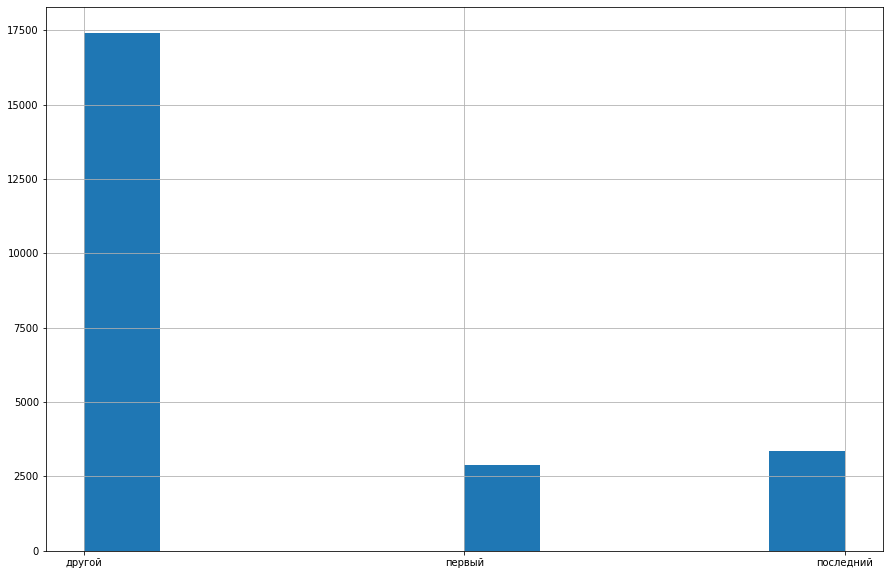

In [81]:
data['floor_names'].hist(figsize = (15,10))

**Пояснение:** 

Был обработан столбец 'floor_names', содержащий информацию о типе этажа (значения — «первый», «последний», «другой»), а для иллюстрации частоты появления построена гистограмма (на ней столбцами голубого цвета разной высоты отображены группы типов этажей; чем выше столбец, тем чаще его группа встречается в исходных данных).

Так, по графику можно сделать вывод, что количество количество типов "другой" в разы чаще встречается в данных, чем остальные типы. "Последний" тип второй по многочисленней, ондакно, не многочисленный. "Первый" тип самый малочисленный, но представлен в удовлетворительном количестве.

Таким образом, данные в столбце 'floor_names' не требуют корректировок для получния наиболее точных и надежных результатов работы.

<AxesSubplot:ylabel='Frequency'>

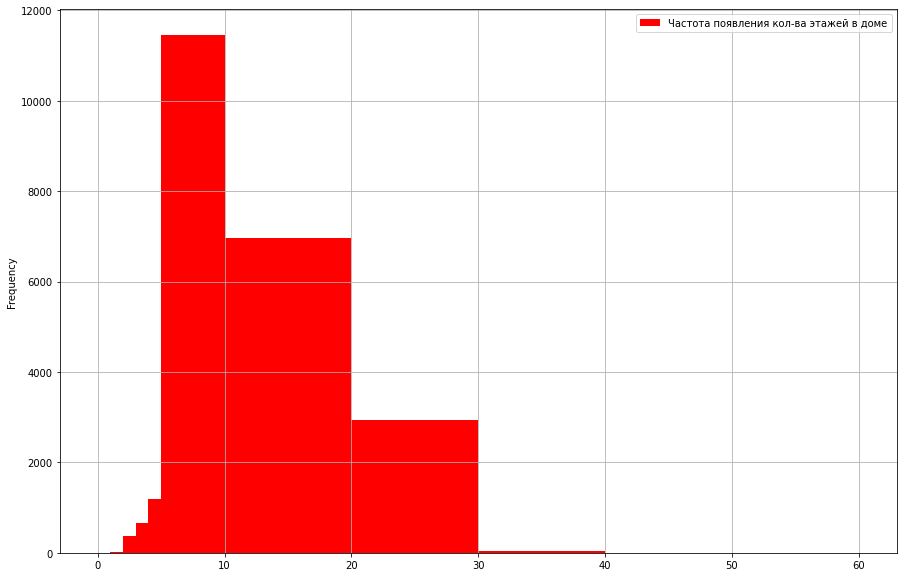

In [82]:
data['floors_total'].plot (kind = 'hist', figsize = (15, 10), grid = True, color = 'red', \
                        label ='Частота появления кол-ва этажей в доме', legend = 'reverse', \
                    bins = [0, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

In [83]:
data['floors_total'].describe()

count    23650.000000
mean        10.684059
std          6.597081
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

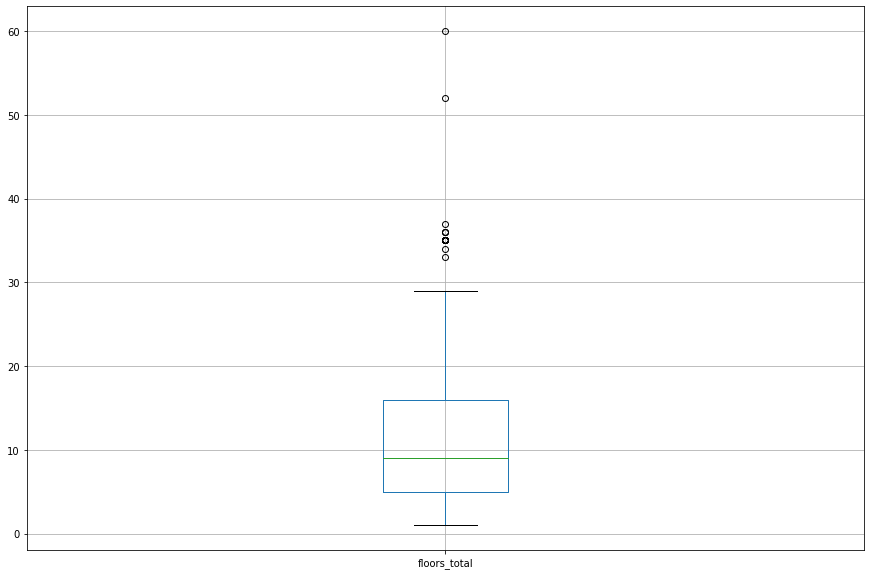

In [84]:
data.boxplot(column = 'floors_total', figsize = (15,10))

In [85]:
data[data['floors_total'] > 30].sort_values(by = 'floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
11575,9,9900000.0,101.0,2016-04-28,3,2.65,33,53.0,32,False,...,NaN,3.0,80.0,53.0,98019.8,3,4,2016,другой,20.0
1697,11,3550000.0,28.0,2018-02-08,1,2.65,34,18.0,23,False,...,NaN,3.0,80.0,410.0,126785.7,3,2,2018,другой,20.0
9579,9,3450000.0,24.8,2019-02-01,0,2.68,35,16.0,17,False,...,NaN,3.0,80.0,45.0,139112.9,4,2,2019,другой,20.0
21599,12,6200000.0,51.0,2017-08-27,2,2.65,35,27.0,13,False,...,NaN,3.0,80.0,NaN,121568.6,6,8,2017,другой,20.0
20938,18,9900000.0,100.9,2019-04-08,3,2.65,35,53.4,22,False,...,NaN,3.0,80.0,NaN,98116.9,0,4,2019,другой,20.0
18629,20,5700000.0,54.0,2017-12-08,1,2.65,35,21.0,31,False,...,NaN,3.0,80.0,128.0,105555.6,4,12,2017,другой,20.0
18617,8,7350000.0,68.5,2017-10-09,2,2.65,35,27.0,3,False,...,609.0,3.0,145.0,41.0,107299.3,0,10,2017,другой,20.0
18218,4,9900000.0,101.0,2018-09-27,3,2.65,35,53.4,33,False,...,NaN,3.0,72.0,7.0,98019.8,3,9,2018,другой,20.0
15982,1,5900000.0,62.0,2015-03-01,2,2.65,35,34.0,9,False,...,NaN,3.0,80.0,547.0,95161.3,6,3,2015,другой,20.0
14347,14,8595000.0,69.7,2018-09-26,2,2.65,35,27.4,26,False,...,NaN,3.0,80.0,NaN,123314.2,2,9,2018,другой,20.0


In [86]:
data[data['floors_total'] == 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
3076,20,2000000.0,80.0,2018-01-03,3,2.65,1,48.5,1,False,...,NaN,NaN,NaN,44.0,25000.0,2,1,2018,последний,NaN
4379,5,5300000.0,58.5,2017-11-15,2,2.65,1,31.6,1,False,...,NaN,NaN,NaN,226.0,90598.3,2,11,2017,последний,NaN
5300,5,2990000.0,60.0,2018-11-15,3,2.65,1,50.0,1,False,...,NaN,NaN,NaN,40.0,49833.3,3,11,2018,последний,NaN
5698,7,450000.0,42.0,2017-07-31,2,2.65,1,23.0,1,False,...,NaN,NaN,NaN,233.0,10714.3,0,7,2017,последний,NaN
5787,16,9000000.0,88.0,2018-08-06,3,2.65,1,3.0,1,False,...,NaN,1.0,792.0,60.0,102272.7,0,8,2018,последний,21.0
7962,4,550000.0,46.2,2018-04-20,3,2.65,1,3.0,1,False,...,NaN,NaN,NaN,45.0,11904.8,4,4,2018,последний,NaN
8335,10,2700000.0,80.0,2018-07-07,3,3.00,1,45.0,1,False,...,NaN,NaN,NaN,51.0,33750.0,5,7,2018,последний,NaN
8388,20,3550000.0,48.2,2019-03-30,3,2.65,1,33.9,1,False,...,NaN,0.0,NaN,NaN,73651.5,5,3,2019,последний,31.0
9517,4,1200000.0,39.4,2018-01-08,2,2.65,1,2.0,1,False,...,NaN,NaN,NaN,45.0,30456.9,0,1,2018,последний,NaN
9752,16,850000.0,62.0,2018-11-10,2,2.65,1,31.0,1,False,...,NaN,NaN,NaN,NaN,13709.7,5,11,2018,последний,NaN


In [87]:
data[(data['floors_total'] >= 1) & (data['floors_total'] <= 29)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,3.0,9,False,...,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.7,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,2.0,12,False,...,173.0,3.0,196.0,602.0,149511.4,1,3,2017,другой,10.0


**Пояснение:** 

Был обработан столбец 'floors_total', содержащий информацию о количестве этажей в доме, а для иллюстрации частоты появления построена гистограмма (на ней столбцами красного цвета разной высоты отображены группы количества этажей; чем выше столбец, тем чаще его группа встречается в исходных данных).

Так, по графику можно сделать вывод, что количество этажей не начинается с 0 (нуля), что говорит о том, что аномальные значения такого рода не присутсвуют среди данных столбца, также можно заметить, что столбец, отражающий 1 (один) этаж, практически равен нулю, что говорит о его относительной малочисленности среди данных столбца. Далее наблюдается небольной рост в виде лестницы для столбцов, отражающих 2 (двух-), 3 (трех-) и 4 (четырех-)этажный дом. На графике видно, что самое распространнное среди данных количество этажей - от 5 (пяти) до 10 (десяти). Затем происходит спад для группы этажей от 11 (одинадцати) до 20 (двадцати), и также спад для 21 (двадцати одного) до 30 (тридцати) этажей. Число этажей в доме более 40 (сорока) следует считать аномальными, так как они единичные и стремяться к нулю.

Более того, сгруппировав столбец 'floors_total' по числу этажей более 40 (сорока), так как согласно гистограмме они являются малочисленными аномалиями, было принято решение ограничить данные столбца по параметру "этажей должно быть меньше или равно 40 (сорока)". 

Также при ограничении данных была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее, тем больше там данных, попавших в данную область. 

Таким образом, для получния наиболее точных и надежных результатов работы было принято решение ограничить данные в столбце 'floors_total' с 1 (одного) по 29 (двадцать девять) этажей включительно.

<AxesSubplot:ylabel='Frequency'>

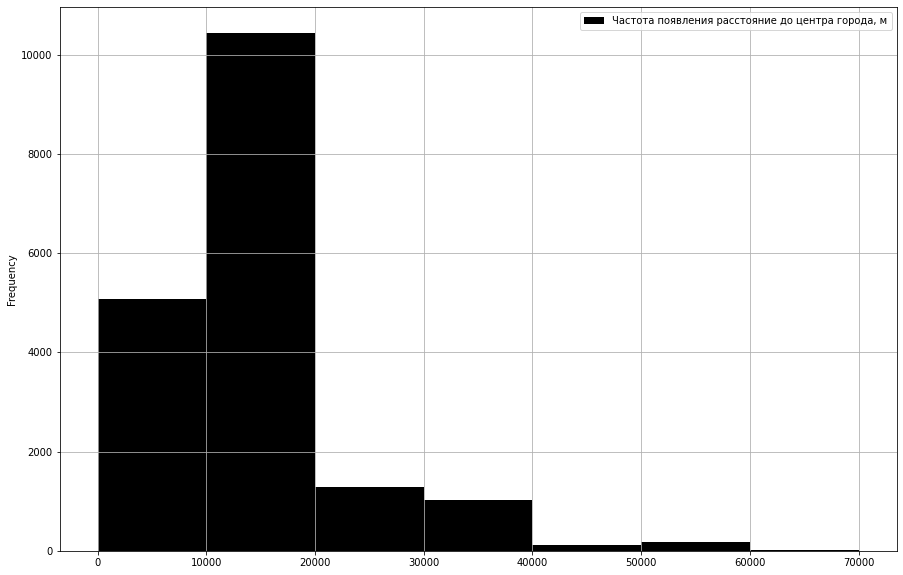

In [88]:
data['cityCenters_nearest'].plot (kind = 'hist', figsize = (15, 10), grid = True, color = 'black', \
                        label ='Частота появления расстояние до центра города, м', legend = 'reverse',\
                                 bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000])

In [89]:
data['cityCenters_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

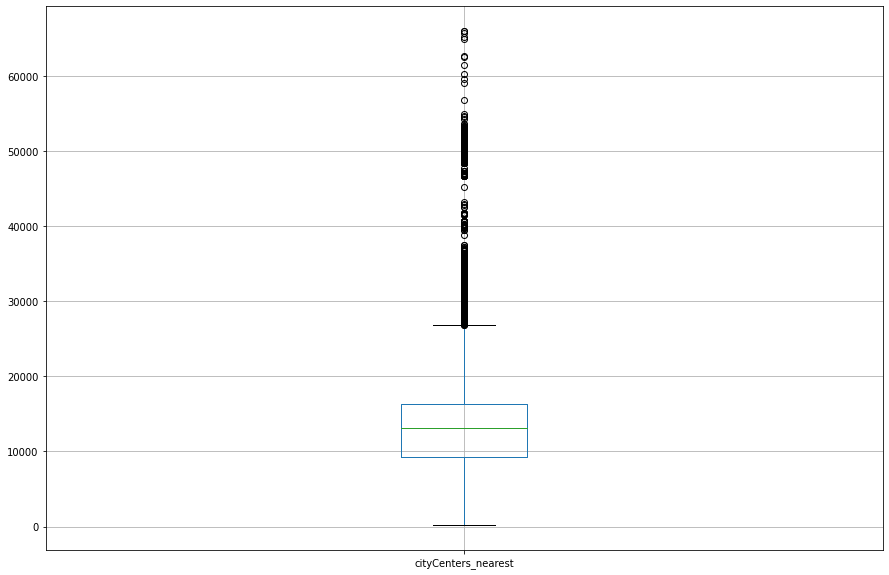

In [90]:
data.boxplot(column = 'cityCenters_nearest', figsize = (15,10))

**Пояснение:** 

Был обработан столбец 'cityCenters_nearest', содержащий информацию о расстояние до центра города (м), а для иллюстрации частоты появления построена гистограмма (на ней столбцами черного цвета разной высоты отображены группы расстояния до центра города; чем выше столбец, тем чаще его группа встречается в исходных данных).

Так, по графику можно сделать вывод, что количество расстояние начинается с 0 (нуля), однако, для такого рода данных это не означает аномальные значения (т.к. квартира может находиться в центре города). Также можно заметить изначальный рост от столбца, отражающего расстояние от 0 м до 10000 м, к столбцу, отражающего от 10001 м до 20000 м, который является наиболее многочисленным по частоте повторения. Далее наблюдается резкий спад для показателей от 20001 м до 30000м, и чуть малочисленнее него столбец, отвечающий за расстояние от 30001 м до 40000 м. Большее расстояние от центра города (от 40001 м до 50000 м и от 50001 м до 60000 м) незначительно отличаются, однако являются крайне малочисленными. Расстояние от центра более 60000 м следует считать аномальным, так как они единичные и стремяться к нулю.

Также при ограничении данных была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее, тем больше там данных, попавших в данную область. 

Однако, учитывая, что в данном столбце содержаться 5511 пропущенных значений, обработать и заменить которые невозможно по причине того, что они были вызваны какой-либо ошибкой сервиса, а следовательно установить ее природу невозможно, было принято решение не включать ограничения по данному столбцу в конечный результат по настоящему шагу работы.

<AxesSubplot:ylabel='Frequency'>

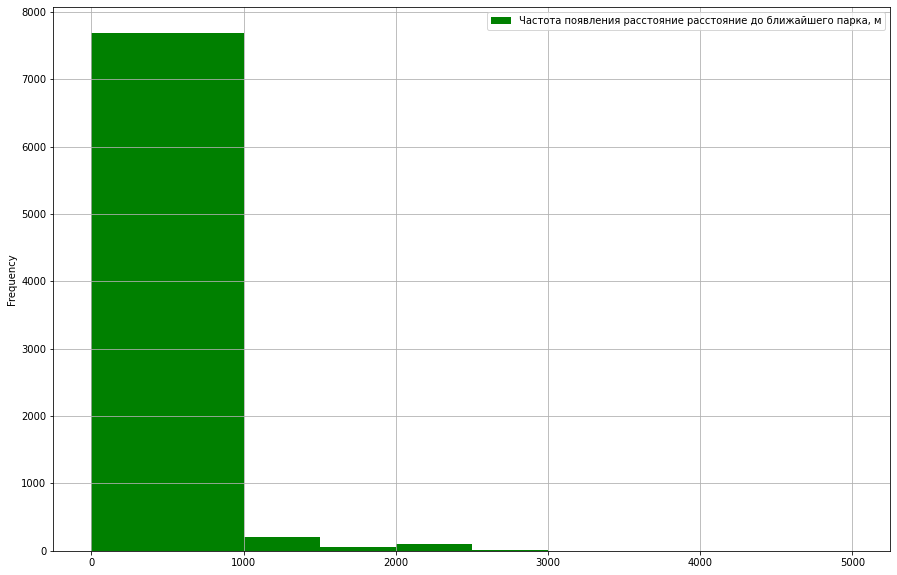

In [91]:
data['parks_nearest'].plot (kind = 'hist', figsize = (15, 10), grid = True, color = 'green', \
                        label ='Частота появления расстояние расстояние до ближайшего парка, м', legend = 'reverse', \
                           bins = [0, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])

In [92]:
data['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

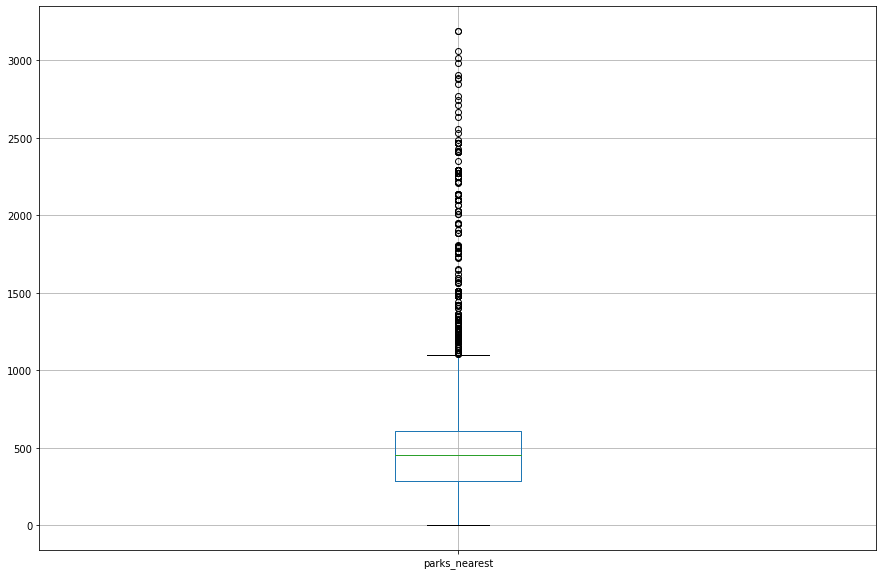

In [93]:
data.boxplot(column = 'parks_nearest', figsize = (15,10))

**Пояснение:** 

Был обработан столбец 'parks_nearest', содержащий информацию о расстояние до ближайшего парка, (м), а для иллюстрации частоты появления построена гистограмма (на ней столбцами зеленого цвета разной высоты отображены группы расстояния до центра города; чем выше столбец, тем чаще его группа встречается в исходных данных).

Так, по графику можно сделать вывод, что количество расстояние начинается с 0 (нуля), однако, для такого рода данных это не означает аномальные значения (т.к. квартира может находиться у парка). Столбец, отражающий расстояние от 0 м до 1000 м, является наиболее многочисленным по частоте повторения. Далее наблюдается резкий спад для показателей от 1001 м до 1500 м, и чуть малочисленнее него столбец, отвечающий за расстояние от 1501 м до 2000 м. Затем подъем для столбца от 2001 м до 2500 м. Большее расстояние до парка следует считать аномальным, так как они единичные и стремяться к нулю.

Также при ограничении данных была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее, тем больше там данных, попавших в данную область. 

Однако, учитывая, что в данном столбце содержаться 15586 пропущенных значений, обработать и заменить которые невозможно по причине того, что они были вызваны какой-либо ошибкой сервиса, а следовательно установить ее природу невозможно, было принято решение не включать ограничения по данному столбцу в конечный результат по настоящему шагу работы.

In [94]:
good_data = data[(data['total_area'] >= 28) & (data['total_area'] <= 400) & (data['living_area'] >= 14) & \
                 (data['living_area'] <= 200) & (data['living_area'] <= (data['total_area'] - data['kitchen_area'])) & \
                 (data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 250) & \
                 (data['last_price'] > 12190) & (data['last_price'] < 763000000) & \
                 (data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 6) & \
                 (data['rooms'] <= 6) & (data['floors_total'] <= 29)]

In [95]:
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.8,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,...,NaN,NaN,NaN,413.0,45000.0,4,7,2017,другой,NaN
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,352.0,1.0,675.0,239.0,73717.9,4,8,2016,другой,34.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой,NaN


In [96]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month_exposition,year_exposition,floor_names,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,3.0,9,False,...,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.7,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,2.0,12,False,...,173.0,3.0,196.0,602.0,149511.4,1,3,2017,другой,10.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'}

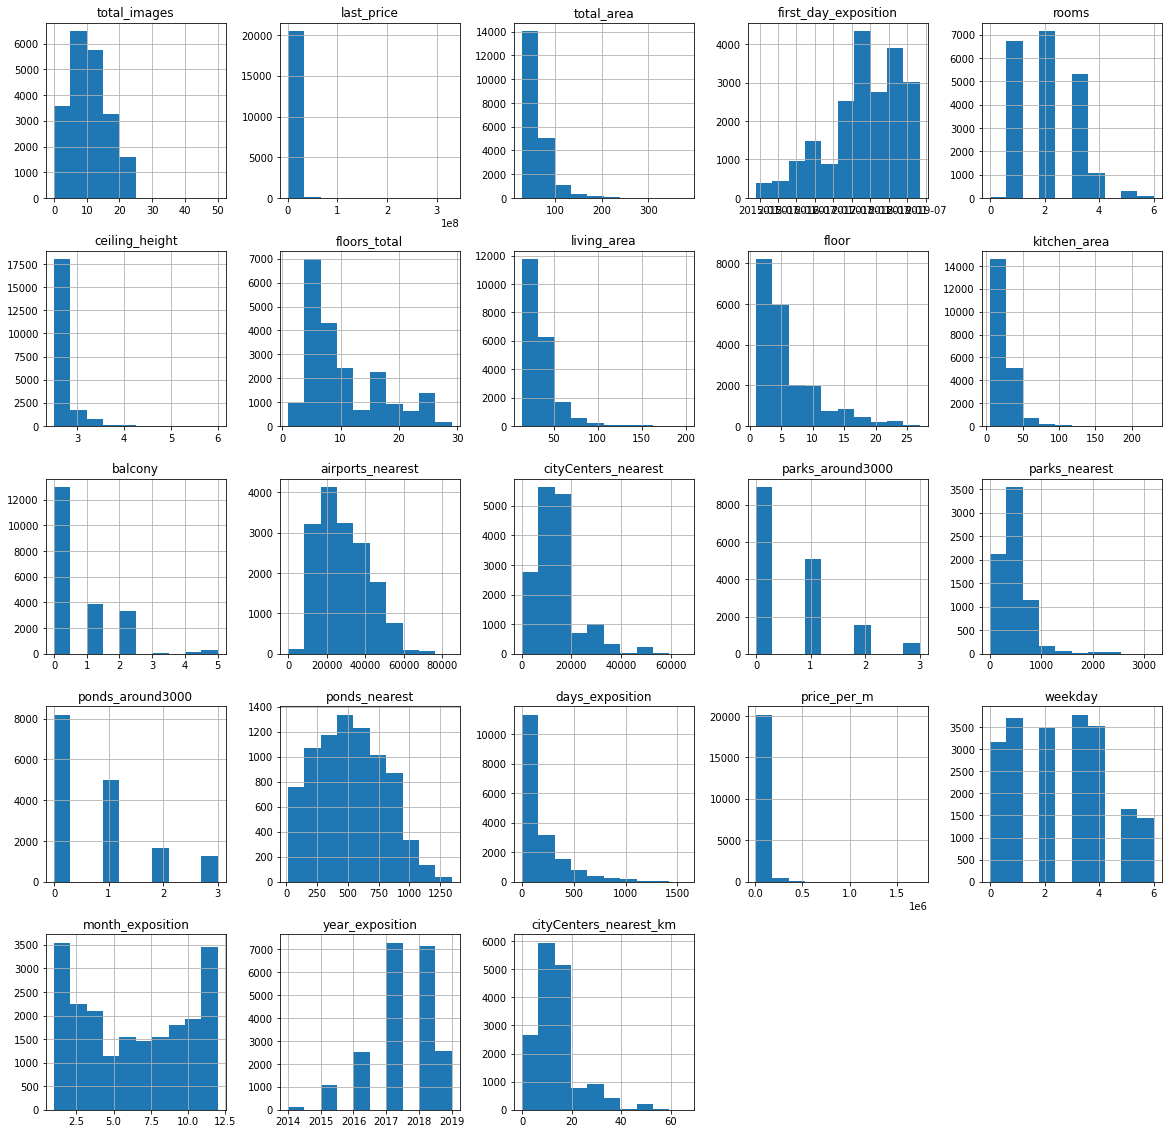

In [97]:
good_data.hist (figsize = (20, 20))

**Пояснение:**

На данном этапе были объеденены все ограничения для проанализированных данных выше. Данное действие поможет приблизиться к получеению наиболее статистически верного и надежного результата работы. 

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
В данной части были изучены перечисленные ниже параметры и построены отдельные гистограммы для каждого из них для большей наглядности данных: 
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка.
    
Так, было выявлено, что в некоторых параметрах встречаются редкие и выбивающиеся значения. Например, в столбце 'ceiling_height' высота потолков у некоторых превышала 25 м и 32 м (стандарты), поэтому данная аномалия была обработана в соответствие с предположением, что она появилась из-за ошибки при вводе данных пользователем сервиса, и в итоге исправлена на, к примеру 2.5 м и 3.2 м. 
    
Однако, в некоторых данных встречались более странные значение и для дальнейшего анализа было принято решение удалить их данных методом отбора. Таким образом, большинство из перечисленных данных были ограничены согласно утвержденным стандартам для жилых помещений и ссылаясь на невозможность объяснения появления некоторых из них.
    
Также ограничения аномальных значений по столбцам 'parks_nearest' (расстояние до ближайшего парка в метрах) и 'cityCenters_nearest' (расстояние до центра города в метрах) не были включены в конечный результат работы ввиду их ненадежных (пропущенных) данных.
    
Таким образом, было отсеяно примерно 12% аномальных данных или данных, которые содержали в себе ошибки, и составлен новый датасет 'good_data', по которому в дальнейшем будет проводиться аналитика проекта.

**КАК БЫСТРО ПРОДАВАЛИСЬ КВАРТИРЫ?**

<AxesSubplot:>

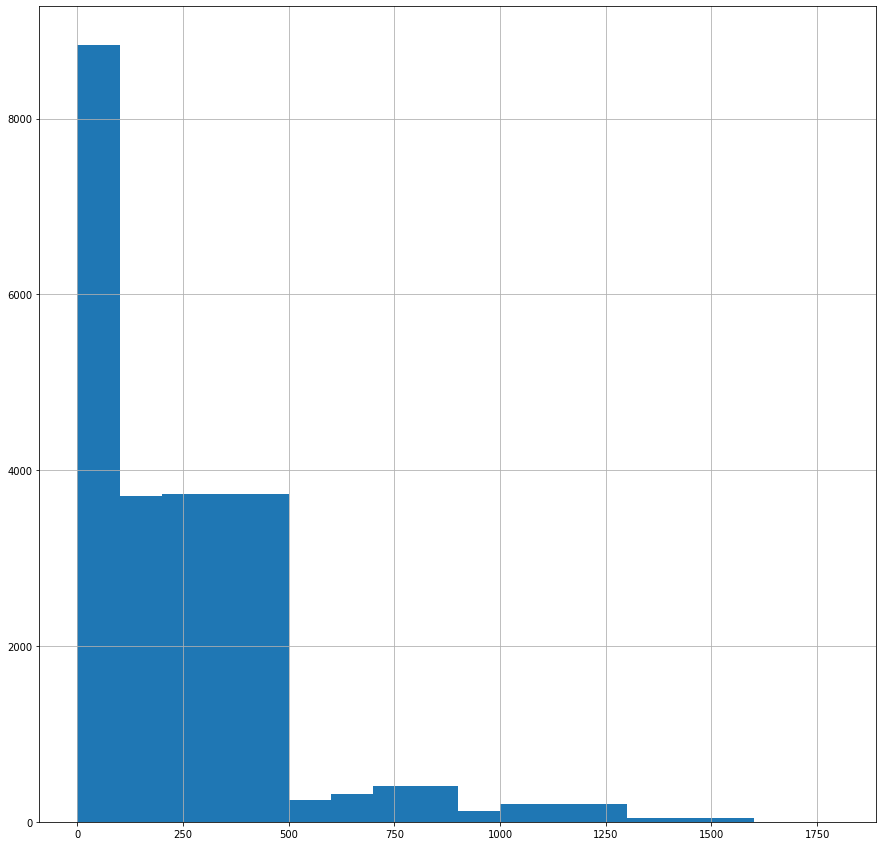

In [98]:
good_data['days_exposition'].hist(figsize=(15,15), \
                                  bins = [0, 100, 200, 500, 550, 600, 700, 900, 1000, 1300, 1600, 1800])

<AxesSubplot:>

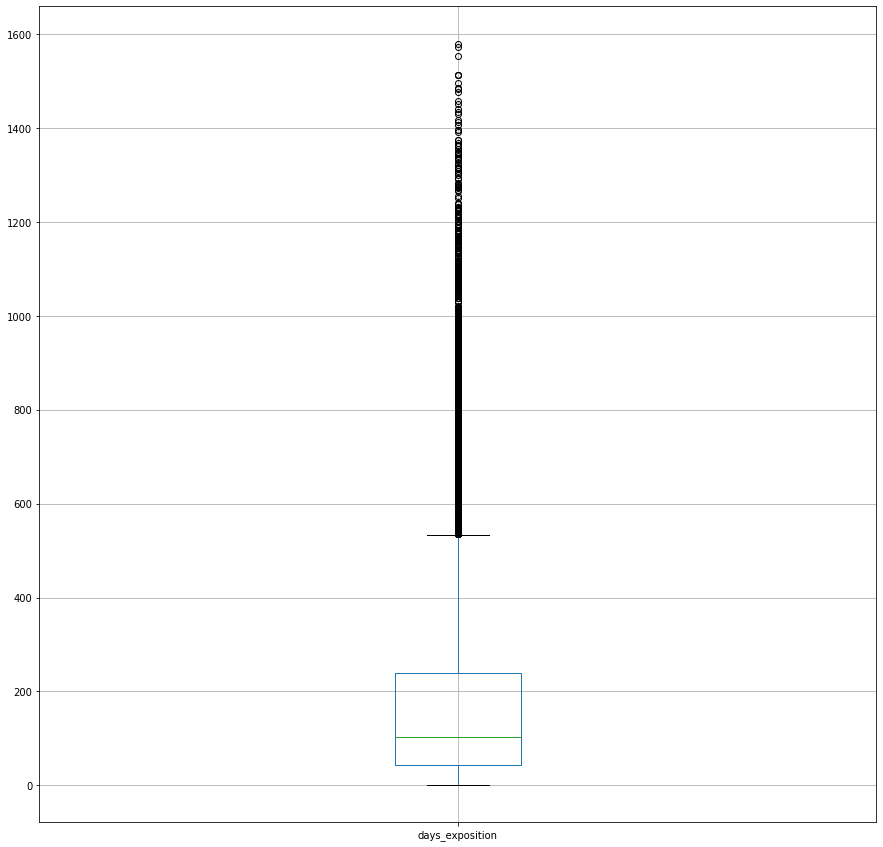

In [99]:
good_data.boxplot(column = ['days_exposition'], figsize = (15,15))

In [100]:
good_data['days_exposition'].describe()

count    17854.000000
mean       185.412905
std        221.878237
min          1.000000
25%         44.000000
50%        102.000000
75%        240.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Пояснение:**

На данном этапе было изучено, как быстро продавались квартиры по столбцу 'days_exposition', который отражает, сколько дней было размещено каждое объявление. 

Согласно расчетам, в среднем объявленния были активны в течении 185 (сто восемьдесят пять) дней до момента их снятия, однако медианное значение показывает результат значитально нижу - 102 (сто два) дня. Такая ситуация сложилась из-за присутствия в данных как очень продолжительных размещений, так и очень краткосроных, что и появляло на значение среднего, поэтому надежнее будет опираться на значение медианы. Так, согласно значению минимума, наиболее краткосрочное размещение объявления составило 1 (один) день, а, согласно значению максимума, наиболее продолжительное - 1580 (одна тысяча пятьсот восемьдесят) дней. Согласно диаграмме рассеивания и полученным расчетам, можно утверждать, что быстрыми можно считать продажами, находящиеся в диапазон от 1 дня до 44 дней, а аномально медленными - примерно от 540 дней и до значения максимума.

**КАКИЕ ФАКТОРЫ БОЛЬШЕ ВСЕГО ВЛИЯЮТ НА СТОИМОСТЬ ОБЪЕКТА?**

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

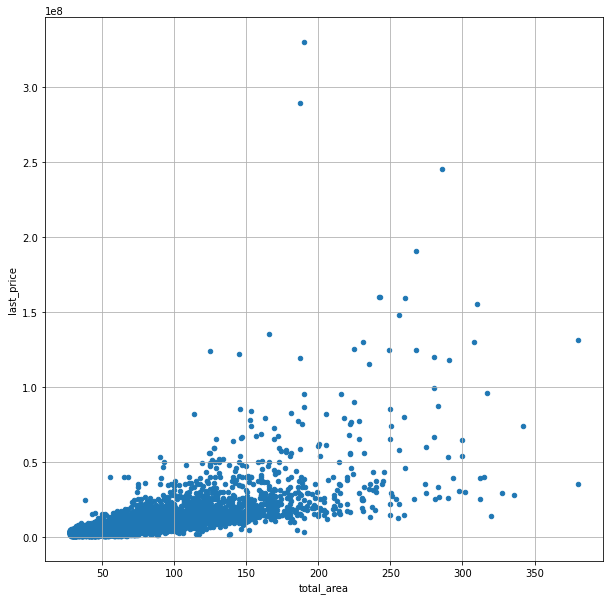

In [101]:
good_data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', figsize = (10,10), grid = True)

In [102]:
good_data['last_price'].corr(good_data['total_area'])

0.6749633631826215

**Пояснение:**

Были обработаны столбцы 'total_area' и 'last_price', в которых содержатся данные об общей площади каждой квартиры и о ее цене на момент продажи соответсвенно. Данные столбцы были рассмотрены на наличие зависимости между содержащейся в них инфрмации.

Так, для визуализации взаимосвязи была построена диаграмма рессеивания, на которой можно заметить "облако из точек" - множественное скопление параметров, отображающих бинарную зависимость друг от друга, из чего можно сделать вывод, что взаимосвязь между ценой продажи и общей прощадью квартиры присутствует.

Для математического изображения такой взаимосвязи был расчитан коэффициент корреляции Пирсона, который в данной случае равен примерно 0.67, что отражает умеренную положительную корреляцию, то есть при возрастании одного показателя, будет расти и другой.

Однако, опираться лишь на коэффициент корреляции Пирсона невозможно, так как он демонстрирует лишь бинарную взаимосвязь параметров, а в случае с рынком недвижимости это зачастую более сложная и многогранная взаимосвязь нескольких факторов одновременно. Так, видно, что с ростом общей площади разброс цены увеличивается (появляются все больше отдельных точек), то есть можно сделать вывод, что на цену начинают влиять другие факторы.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

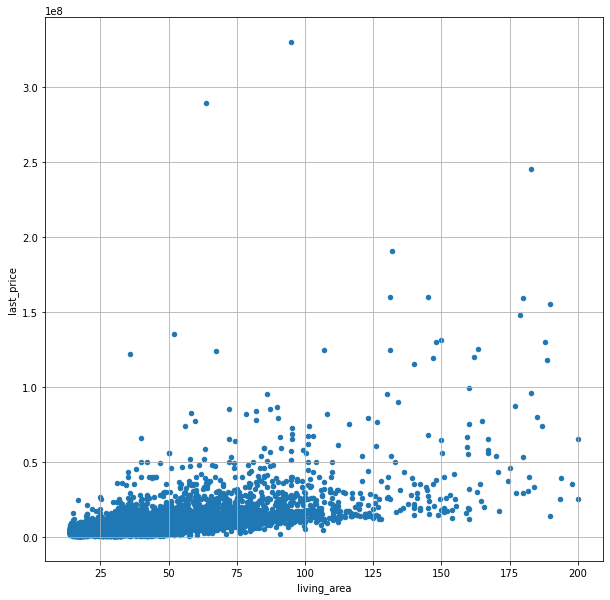

In [103]:
good_data.plot(x = 'living_area', y = 'last_price', kind = 'scatter', figsize = (10,10), grid = True)

In [104]:
good_data['last_price'].corr(good_data['living_area'])

0.5887560034244906

**Пояснение:**


Были обработаны столбцы 'living_area' и 'last_price', в которых содержатся данные о жилой площади каждой квартиры и о ее цене на момент продажи соответсвенно. Данные столбцы были рассмотрены на наличие зависимости между содержащейся в них инфрмации.

Так, для визуализации взаимосвязи была построена диаграмма рессеивания, на которой можно заметить "облако из точек" - множественное скопление параметров, отображающих бинарную зависимость друг от друга, из чего можно сделать вывод, что взаимосвязь между ценой продажи и жилой прощадью квартиры присутсвует.

Для математического изображения такой взаимосвязи был расчитан коэффициент корреляции Пирсона, который в данной случае равен примерно 0.59, что отражает умеренную положительную корреляцию, то есть при возрастании одного показателя, будет расти и другой.

Однако, опираться лишь на коэффициент корреляции Пирсона невозможно, так как он демонстрирует лишь бинарную взаимосвязь параметров, а в случае с рынком недвижимости это зачастую более сложная и многогранная взаимосвязь нескольких факторов одновременно. Так, видно, что с ростом жилой площади разброс цены увеличивается (появляются все больше отдельных точек), то есть можно сделать вывод, что на цену начинают влиять другие факторы.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

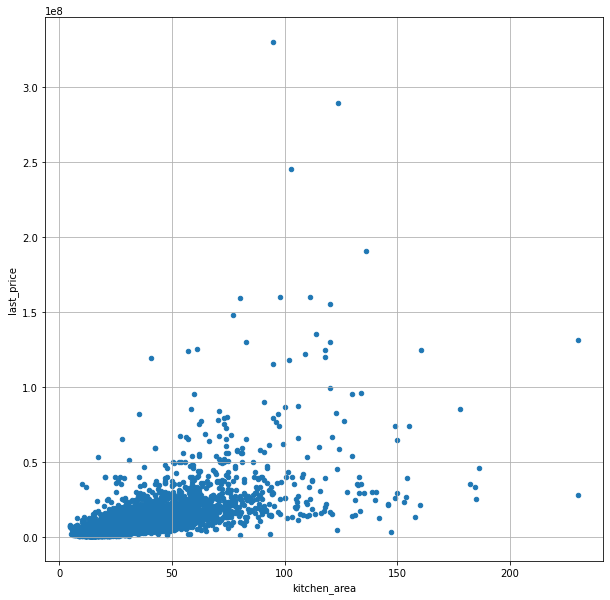

In [105]:
good_data.plot(x = 'kitchen_area', y = 'last_price', kind = 'scatter', figsize = (10,10), grid = True)

In [106]:
good_data['last_price'].corr(good_data['kitchen_area'])

0.6440485216373891

**Пояснение:**

Были обработаны столбцы 'kitchen_area' и 'last_price', в которых содержатся данные о площади кухни каждой квартиры и о ее цене на момент продажи соответсвенно. Данные столбцы были рассмотрены на наличие зависимости между содержащейся в них инфрмации.

Так, для визуализации взаимосвязи была построена диаграмма рессеивания, на которой можно заметить "облако из точек" - множественное скопление параметров, отображающих бинарную зависимость друг от друга, из чего можно сделать вывод, что взаимосвязь между ценой продажи и  прощадью кухни квартиры присутсвует.

Для математического изображения такой взаимосвязи был расчитан коэффициент корреляции Пирсона, который в данной случае равен примерно 0.64, что отражает умеренную положительную корреляцию, то есть при возрастании одного показателя, будет расти и другой.

Однако, опираться лишь на коэффициент корреляции Пирсона невозможно, так как он демонстрирует лишь бинарную взаимосвязь параметров, а в случае с рынком недвижимости это зачастую более сложная и многогранная взаимосвязь нескольких факторов одновременно. Так, видно, что с ростом площади кухни разброс цены увеличивается (появляются все больше отдельных точек), то есть можно сделать вывод, что на цену начинают влиять другие факторы.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

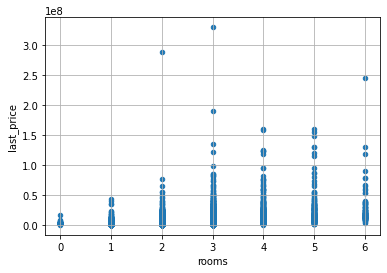

In [107]:
good_data.plot(x = 'rooms', y = 'last_price', kind = 'scatter', fig = (10,10), grid = True)

In [108]:
good_data['last_price'].corr(good_data['rooms'])

0.3779716565055216

**Пояснение:**

Были обработаны столбцы 'rooms' и 'last_price', в которых содержатся данные о количестве комнат в каждой квартиры и о ее цене на момент продажи соответсвенно. Данные столбцы были рассмотрены на наличие зависимости между содержащейся в них инфрмации.

Так, для визуализации взаимосвязи была построена диаграмма рессеивания, на которой можно заметить "башенки из точек" - множественное скопление параметров, отображающих бинарную зависимость друг от друга, из чего можно сделать вывод, что взаимосвязь между ценой продажи и количеством комнат квартиры присутсвует.

Для математического изображения такой взаимосвязи был расчитан коэффициент корреляции Пирсона, который в данной случае равен примерно 0.38, что отражает умеренную положительную корреляцию, то есть при возрастании одного показателя, будет расти и другой.

Однако, опираться лишь на коэффициент корреляции Пирсона невозможно, так как он демонстрирует лишь бинарную взаимосвязь параметров, а в случае с рынком недвижимости это зачастую более сложная и многогранная взаимосвязь нескольких факторов одновременно. Так, видно, что с ростом числа комнат разброс цены увеличивается (появляются все больше отдельных точек), то есть можно сделать вывод, что на цену начинают влиять другие факторы.

<AxesSubplot:xlabel='floor_names', ylabel='last_price'>

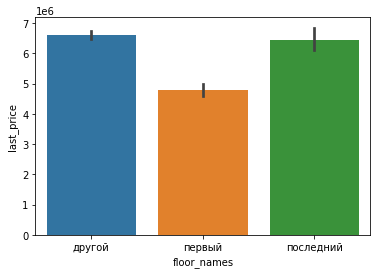

In [109]:
sns.barplot(x = 'floor_names', y = 'last_price', data = good_data)

**Пояснение:**

Были обработаны столбцы 'floor_names' и 'last_price', в которых содержатся данные о типе этажа каждой квартиры и о ее цене на момент продажи соответсвенно. Данные столбцы были рассмотрены на наличие зависимости между содержащейся в них инфрмации.

Так, для визуализации взаимосвязи была построена столбчатая диаграмма, на которой можно заметить, что с небольшим отрывом в среднем цены выше на квартирах, расположенных на этажах типа "другой" (т.е. не первый и не последний этажи), однако, отрыв незначчительный от типа "последний". Тип этажа "первый" занимает последнее место по средней цене за квартиру. 

Таким образом, можно сделать вывод, что взаимосвязь между ценой продажи и типом этажа квартиры присутсвует. Главное - уточнить, что на отражается в фразе "скорее квартиры расположенные на первом этаже будут всегда дешевле остальных, находящихся на этажах выше".

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

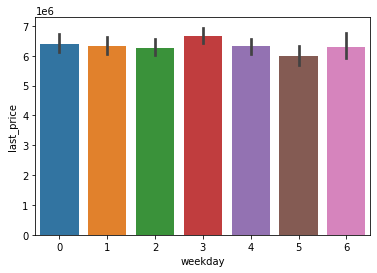

In [110]:
sns.barplot(x = 'weekday', y = 'last_price', data = good_data)

**Пояснение:**

Были обработаны столбцы 'weekday' и 'last_price', в которых содержатся данные о дне недели публикации объявления с каждой квартиры и о ее цене на момент продажи соответсвенно. Данные столбцы были рассмотрены на наличие зависимости между содержащейся в них инфрмации.

Так, для визуализации взаимосвязи была построена столбчатая диаграмма, на которой можно заметить, что с небольшим отрывом в среднем цены выше на квартиры, выставленные на продажу в четверг, а самые минимальные средние цены - в воскресенье. Однако, стоит учитывать, отрыв между столбцами дней недели незначительный, поэтому сделать однозначный вывод, что цена и день взаимосвязаны нельзя.

<AxesSubplot:xlabel='month_exposition', ylabel='last_price'>

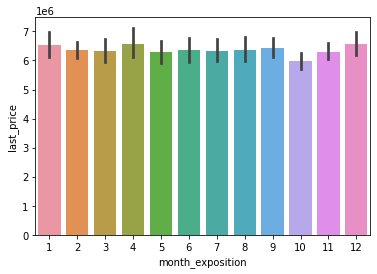

In [111]:
sns.barplot(x = 'month_exposition', y = 'last_price', data = good_data)

**Пояснение:**

Были обработаны столбцы 'month_exposition' и 'last_price', в которых содержатся данные о месяце публикации объявления с каждой квартиры и о ее цене на момент продажи соответсвенно. Данные столбцы были рассмотрены на наличие зависимости между содержащейся в них инфрмации.

Так, для визуализации взаимосвязи была построена столбчатая диаграмма, на которой можно заметить, что с небольшим отрывом в среднем цены выше на квартиры, выставленные на продажу в декабре, а самые минимальные средние цены - в октябре. Однако, стоит учитывать, отрыв между столбцами месяцев незначительный, поэтому сделать однозначный вывод, что цена и месяц взаимосвязаны нельзя.

<AxesSubplot:xlabel='year_exposition', ylabel='last_price'>

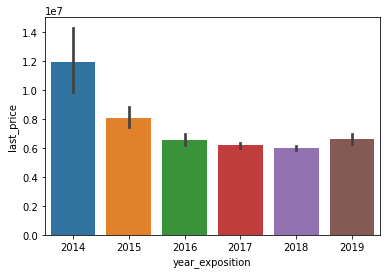

In [112]:
sns.barplot(x = 'year_exposition', y = 'last_price', data = good_data)

**Пояснение:**

Были обработаны столбцы 'year_exposition' и 'last_price', в которых содержатся данные о годе публикации объявления с каждой квартиры и о ее цене на момент продажи соответсвенно. Данные столбцы были рассмотрены на наличие зависимости между содержащейся в них инфрмации.

Так, для визуализации взаимосвязи была построена столбчатая диаграмма, на которой можно заметить, что с большим отрывом в среднем цены выше на квартиры, выставленные на продажу в 2014 году, далее в 2015 году происходит резкий спад, который сменяется примерно одинаковым значением средней цены на квартиры в течение с 2016 по 2019 года. 

Таким образом, учитывая, что отрыв между большинством столбцов диагарммы незначительный, но присутсвует большой отрыв у столбца за 2014 год, можно сделать вывод, что цена и год взаимосвязаны. Такая взаимосвязь может быть выявлена при анализе экономической и политической ситуации в стране или регионе за определенный год, что, в свою очередь, и будет влиять на рост или спад цен на рынке недвижимости.

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
Здесь был изучен поставленный вопрос: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"\
Среди факторов были рассмотрены:
* общая площадь;
* жилая площадь;
* площадь кухни;
* количество комнат;
* этаж (первый, последний, другой);
* дата размещения (день недели, месяц, год).

Также, совместно с графиками для каждого фактора, был расчитан коэффициент корреляции Пирсона для количественных факторов (общая площадь, жилая площадь, площадь кухни, количество комнат) для большей иллюстрации зависимости.
    
Таким образом были получены следующие результаты:
* коэффициент корреляции Пирсона между общей площадью и ценой объекта равен примерно 0.67, что отражает уеренную положительную связь (с увеличением общей площади объекта его цена тоже возрастет);
* коэффициент корреляции Пирсона между жилой площадью и ценой объекта равен примерно 0.59, что отражает умеренную положительную связь (с увеличением жилой площади объекта его цена тоже возрастет);
* коэффициент корреляции Пирсона между площадью кухни и ценой объекта равен примерно 0.64, что отражает умеренную положительную связь (с увеличением площади кухни объекта его цена тоже возрастет);
* коэффициент корреляции Пирсона между количеством комнат и ценой объекта равен примерно 0.38, что отражает умеренную положительную свзяь (с увеличением количества комнат объекта его цена тоже возрастет);
* диаграмма демонстрирует, что в среднем люди склонны ставить цены выше на жилые помещения не на этажах выше первого;
* диаграмма демонстрирует, что цены на жилые помещения практически не зависят от дня недели размещения объявления;
* диаграмма демонстрирует, что цены на жилые помещения практически не зависят от месяца размещения объявления;
* диаграмма демонстрирует, что есть некая зависимость между ценой на жилые помещения и годом размещения объявления.

**СРЕДНЯЯ ЦЕНА НА ОДИН КВАДРАТНЫЙ МЕТР В ТОП 10 НАСЕЛЕННЫХ ПУНКТАХ**

In [113]:
locality_top = good_data.pivot_table(index = 'locality_name', values = 'price_per_m', \
                                     aggfunc = ['count', 'mean', 'median'])

In [114]:
locality_top.columns

MultiIndex([( 'count', 'price_per_m'),
            (  'mean', 'price_per_m'),
            ('median', 'price_per_m')],
           )

In [115]:
locality_top.columns = ['price_per_m_count', 'price_per_m_mean', 'price_per_m_median']

In [116]:
locality_top_10 = locality_top.sort_values(by = 'price_per_m_count', ascending = False). head(10)
locality_top_10

,price_per_m_count,price_per_m_mean,price_per_m_median
locality_name,,,
Санкт-Петербург,13968,113381.872731,103854.20
Мурино,425,85224.210118,84507.00
поселок Шушары,374,77272.610428,75740.70
Кудрово,361,94914.877562,95588.20
Всеволожск,349,68728.451862,65648.90
Пушкин,338,103395.932249,99993.60
Колпино,317,74983.441640,74468.10
Гатчина,286,68746.690909,67746.30
поселок Парголово,270,90019.055926,91073.25


In [117]:
print(locality_top_10[locality_top_10['price_per_m_mean'] == min(locality_top_10['price_per_m_mean'])])

print(locality_top_10[locality_top_10['price_per_m_mean'] == max(locality_top_10['price_per_m_mean'])])

               price_per_m_count  price_per_m_mean  price_per_m_median
locality_name                                                         
Всеволожск                   349      68728.451862             65648.9
                 price_per_m_count  price_per_m_mean  price_per_m_median
locality_name                                                           
Санкт-Петербург              13968     113381.872731            103854.2


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
**Вывод:** \
\
На данном этапе была расчитана средняя цена одного квадратного метра в 10 населённых пунктах по наибольшему количеством объявлений.

Согласно результатам вычислений населённый пункт с самой высокой средней стоимостью квадратного метра - это город Санкт-Петербург с показателем равным 113381.87 д.е./м². Медианное значение при этом равно 103854.2 д.е./м².
    
Населённый пункт с самой низкой средней стоимостью квадратного метра - это город Всеволожск с показателем равным 68728.45 д.е./м².
Медианное значение равно 65648.9 д.е./м².

**СРЕДНЯЯ ЦЕНА ДЛЯ КАЖДОГО КИЛОМЕТРА ОТ ЦЕНТРА САНКТ-ПЕТЕРБУРГА**

In [118]:
price_per_km_spb = good_data[good_data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest_km') \
['last_price'].mean()
price_per_km_spb = price_per_km_spb.reset_index()
price_per_km_spb

,cityCenters_nearest_km,last_price
0,0.0,3.267940e+07
1,1.0,2.108905e+07
2,2.0,1.673135e+07
3,3.0,1.043168e+07
4,4.0,1.151767e+07
5,5.0,1.270071e+07
6,6.0,1.420042e+07
7,7.0,1.414590e+07
8,8.0,9.283784e+06
9,9.0,7.045565e+06


In [119]:
price_per_km_spb['last_price'].corr(price_per_km_spb['cityCenters_nearest_km'])

-0.7298107246283609

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='price'>

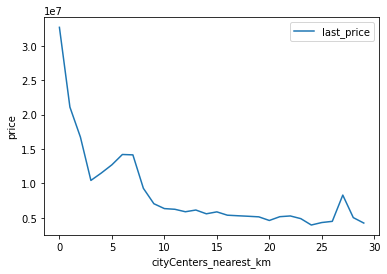

In [120]:
price_per_km_spb.plot(x = 'cityCenters_nearest_km', y = 'last_price', xlabel = 'cityCenters_nearest_km', \
                    ylabel = 'price')

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
На данном этапе была рассмотрена зависимость стоимости объектов от расстояния до центра города в Санкт-Петербурге. Для этого изначальный датасет был перегруппирован по удаленности каждой квартиры от центра Санкт-Петербурга в километрах и соответсвенно была расчитана средняя цена для каждого километра, а также был построен линейный график, демонстрирующий эту зависимость.

Также был расчитан коэффициент корреляции Пирсона для данных показателей, который составил примерно -0.73, что демонстрирует сильную 
отрицательную корреляцию (чем меньше километров до центра, тем выше цена).

### Общий вывод

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

В данном исследовании необходимо было изучить архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет от сервиса Яндекс.Недвижимость. Основная задача для анализа - установить параметры для определения рыночной стоимости объектов недвижимости для построения автоматизированной системы.

В качестве материала для анализа были получены два вида данных. Первый вид - заполненные пользователем сервиса самостоятельно, второй - получены автоматически сервисом на основе картографических данных. Полный список данных следующий: 
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Работа над данным проектом была разделена на 4 шага:
1) изучение общей информации;\
2) предобработка данных;\
3) добавление новых параметров;\
4) исследовательский анализ данных.
    
При изучении общей информации удалось:
    
* открыт файл с данными и изучить общуб информация по нему;
    
* обнаружить что, столбцы 'first_day_exposition', 'floors_total', 'balcony' - имеют неправильный тип данных;
    
* проанализировать заголовки столбцов, после чего не было выявлено никаких замечаний касательно них;

* обнаружить, что в 14 (четырнадцати) следующих столбцах: 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' - присутсвуют пропущенные значения; 
    
* построить гистограммы каждого показателя и, после предварительного анализа их распределений, возникли сомнения по поводу хранящихся там аномальных значений. 
    
При предобработке данных удалось:
    
* обнаружить и обработать пропуски в 14 (четырнадцати) столбцах; стоит отметить, что 7 (семь) из них - это данные, полученные непосредственно от клиентов сервиса, когда как остальные 7 (семь) - это данные, которые заполняются автоматически самим сервисом на основе картографических данных;
    
* измененить типы данных в 3 (трех) столбцах; данные изменения обусловлены корректностью анализа в последующих шагах работы, так как неправильно указанный тип данных может повлиять на выполнение кода в целом или на правдивость его результата;
    
* в столбце 'locality_name' с  названиями населённых пунктов выявить неявные дубликаты; такими дабликатами являются, к примеру, различные написания одного слова/словосочетаний, как 'поселок' и 'посёлок' или 'городской поселок' и 'поселок городского типа'; подобные неявные дубликаты устранимы и появляются по причине того, что каждый клиент заполняет данную графу с населенным пунктом своими словами.
    
На третьем шаге, для получения наиболее достоверных результатов работы, в изначальный датасет были добавлены следующие параметры:
1) 'price_per_m' - цена одного квадратного метра;\
2) 'weekday' - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);\
3) 'month_exposition' - месяц публикации объявления;\
4) 'year_exposition' - год публикации объявления;\
5) 'floor_names' - тип этажа квартиры («первый», «последний», «другой»);\
6) 'cityCenters_nearest_km' - расстояние до центра города в километрах.
    
На последнем, четвертом, шаге работы над проектом был проведен исследовательский анализ данных и получены следующие выводы, предназначенные для ответа на поставленную задачу изначально. Во-первых, были изучены параметры, такие как: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры («первый», «последний», «другой», общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка - а также были построены гистограммы для каждого из них с целью представления изменений данных с течением времени и для наглядного сравнения различных величин. Так, было выявлено, что в некоторых параметрах встречаются редкие и выбивающиеся значения. Например, в столбце 'ceiling_height' высота потолков у некоторых превышала 25 м и 32 м (стандарты), поэтому данная аномалия была обработана в соответствие с предположением, что она появилась из-за ошибки при вводе данных пользователем сервиса, и в итоге исправлена на, к примеру 2.5 м и 3.2 м. Однако, в некоторых данных встречались более странные значение и для дальнейшего анализа было принято решение удалить их данных методом отбора. Таким образом, большинство из перечисленных данных были ограничены согласно утвержденным стандартам для жилых помещений и ссылаясь на невозможность объяснения появления некоторых из них. Также ограничения аномальных значений по столбцам 'parks_nearest' (расстояние до ближайшего парка в метрах) и 'cityCenters_nearest' (расстояние до центра города в метрах) не были включены в конечный результат работы ввиду их ненадежных (пропущенных) данных. Таким образом, было отсеяно примерно 12% аномальных данных или данных, которые содержали в себе ошибки, и составлен новый датасет 'good_data', по которому в дальнейшем будет проводиться аналитика проекта.

Во-вторых, было изучено, как быстро продавались квартиры по столбцу 'days_exposition', который отражает, сколько дней было размещено каждое объявление. Согласно расчетам, в среднем объявленния были активны в течении 185 (сто восемьдесят пять) дней до момента их снятия, однако медианное значение показывает результат значитально нижу - 102 (сто два) дня. Такая ситуация сложилась из-за присутствия в данных как очень продолжительных размещений, так и очень краткосроных, что и появляло на значение среднего, поэтому надежнее будет опираться на значение медианы. Так, согласно значению минимума, наиболее краткосрочное размещение объявления составило 1 (один) день, а, согласно значению максимума, наиболее продолжительное - 1580 (одна тысяча пятьсот восемьдесят) дней. Согласно диаграмме рассеивания и полученным расчетам, можно утверждать, что быстрыми можно считать продажами, находящиеся в диапазон от 1 дня до 45 дней, а аномально медленными - примерно от 540 дней и до значения максимума.
    
В-третьих, был изучен поставленный вопрос: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?". Среди факторов были рассмотрены:общая площадь, жилая площадь, площадь кухни, количество комнат, этаж (первый, последний, другой), дата размещения (день недели, месяц, год). Для выявления таких взаимосвязей, совместно с графиками для каждого фактора, был расчитан коэффициент корреляции Пирсона для количественных факторов (общая площадь, жилая площадь, площадь кухни, количество комнат) и для большей иллюстрации. Таким образом были получены следующие результаты:
* коэффициент корреляции Пирсона между общей площадью и ценой объекта равен примерно 0.67, что отражает уеренную положительную связь (с увеличением общей площади объекта его цена тоже возрастет);
* коэффициент корреляции Пирсона между жилой площадью и ценой объекта равен примерно 0.59, что отражает умеренную положительную связь (с увеличением жилой площади объекта его цена тоже возрастет);
* коэффициент корреляции Пирсона между площадью кухни и ценой объекта равен примерно 0.64, что отражает умеренную положительную связь (с увеличением площади кухни объекта его цена тоже возрастет);
* коэффициент корреляции Пирсона между количеством комнат и ценой объекта равен примерно 0.38, что отражает умеренную положительную свзяь (с увеличением количества комнат объекта его цена тоже возрастет);
* диаграмма демонстрирует, что в среднем люди склонны ставить цены выше на жилые помещения не на этажах выше первого;
* диаграмма демонстрирует, что цены на жилые помещения практически не зависят от дня недели размещения объявления;
* диаграмма демонстрирует, что цены на жилые помещения практически не зависят от месяца размещения объявления;
* диаграмма демонстрирует, что есть некая зависимость между ценой на жилые помещения и годом размещения объявления.
    
В-четвертых, была расчитана средняя цена одного квадратного метра в 10 населённых пунктах по наибольшему количеством объявлений. Согласно результатам вычислений населённый пункт с самой высокой средней стоимостью квадратного метра - это город Санкт-Петербург с показателем равным 113381.87 д.е./м². Медианное значение при этом равно 103854.2 д.е./м². Населённый пункт с самой низкой средней стоимостью квадратного метра - это город Всеволожск с показателем равным 68728.45 д.е./м².
Медианное значение равно 65648.9 д.е./м².
    
В-пятых, была рассмотрена зависимость стоимости объектов от расстояния до центра города в Санкт-Петербурге. Для этого изначальный датасет был перегруппирован по удаленности каждой квартиры от центра Санкт-Петербурга в километрах и соответсвенно была расчитана средняя цена для каждого километра, а также был построен линейный график, демонстрирующий эту зависимость. Также был расчитан коэффициент корреляции Пирсона для данных показателей, который составил примерно -0.73, что демонстрирует сильную 
отрицательную корреляцию (чем меньше километров до центра, тем выше цена). 
    
Таким образом, на данном этапе анализа можно сделать вывод, что для установления параметров определения рыночной стоимости объектов недвижимости наиболее эффективно будет использование и ориентация на такие факторы как: общая площадь объекта, его жилая площадь, площадь кухни, количество комнат, все из которых имеют положительную связь с ценой объекта, то есть чем выше данные факторы, тем выше будет стоимость, но также некое значение будет иметь этаж объекта - если не первый, то стоимость объекта возрастает. Более того, расстояния до центра города имеет отрицательную корреляцию с ценой объекта, что означает, что чем меньше такое расстояние, тем больше будет стоимость. Стоит также отметить тот факт, что года размещения объявления о продаже жилого помещения имеет связь с его стоимостью: обуславливается это экономической и политической обстановкой в стране продажи, которые напрямую влияют на рынок недвижимости. Также на стоимость жилового помещения влияет и населенный пункт, в котором оно расположено, так, чем крупнее населенный пункт, тем выше стоимость.
    
Однако, опираться лишь на имеющиеся результаты было бы ошибкой, так как коэффициент корреляции Пирсона демонстрирует лишь бинарную взаимосвязь параметров, а в случае с рынком недвижимости это зачастую более сложная и многогранная взаимосвязь нескольких факторов одновременно. Опираясь на данное замечание, рекомендуется на дальнейших этапах работы над проектом рассмотреть взаимосвязь разлычных групп данных для получения наиболее достоверного результата.